## Importing the Necessary Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords

## Importing the Twitter Dataset

In [25]:
df = pd.read_csv("tweets.csv",encoding='latin-1')
df

ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
99984   99996          0  @Cupcake  seems like a repeating problem   hop...
99985   99997          1  @cupcake__ arrrr we both replied to each other...
99986   99998          0                     @CuPcAkE_2120 ya i thought so 
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988  100000          1                    @cupcake_kayla haha yes you do 

[99989 rows x 3 columns]

## Cleaning the Dataset using Regular Expressions

In [26]:
 def clean(txt):
    txt = re.sub(r"@[a-zA-Z0-9]+","",txt) #Removing "@" tags
    txt = re.sub(r"#","",txt) #Removing hash tags
    txt = re.sub(r"https?:\/\/","",txt) # Removing urls
    txt = re.sub(r"(:|\\|\/|\(|\)|\*|\?|\.|!|_|-|=|\[|'|;|%|\$|~|@){2,}","",txt) #Removing unnecessary punctuation
    txt = re.sub(r"&quot;","",txt) #Removing Quotation marks objects
    txt = re.sub(r"&lt","",txt) #Removing less than symbol object
    txt = re.sub(r"&gt","",txt) #Removing greater than symbol object
    txt = re.sub(r"bit.ly\/[a-zA-Z0-9]{2,}","",txt) #Removing bit.ly/.... urls
    txt = re.sub(r"blip.fm\/[a-zA-Z0-9]{2,}","",txt) #Removing blip.fm/.... urls
    txt = re.sub(r"twitpic.com\/[a-zA-Z0-9]{2,}","",txt) #Removing twitpic.com objects
    txt = re.sub(r"_[a-zA-Z0-9]{2,}","",txt) #Removing __tags 
    return txt

## Applying the regular expressions to each tweet in the dataframe and then replacing it with the cleaned tweet

In [27]:
df['SentimentText'] = df['SentimentText'].apply(clean)
df

ItemID  Sentiment                                      SentimentText
0           1          0                        is so sad for my APL friend
1           2          0                      I missed the New Moon trailer
2           3          1                            omg its already 7:30 :O
3           4          0             Omgaga. Im sooo  im gunna CRy. I've...
4           5          0           i think mi bf is cheating on me      ...
...       ...        ...                                                ...
99984   99996          0    seems like a repeating problem   hope you're...
99985   99997          1   arrrr we both replied to each other over diff...
99986   99998          0                                   ya i thought so 
99987   99999          1      Yes. Yes. I'm glad you had more fun with me. 
99988  100000          1                                   haha yes you do 

[99989 rows x 3 columns]

## Dropping the tweets with empty strings

In [28]:
df['SentimentText'].replace('', np.nan, inplace=True)
df.dropna(subset=['SentimentText'], inplace=True)
df

ItemID  Sentiment                                      SentimentText
0           1          0                        is so sad for my APL friend
1           2          0                      I missed the New Moon trailer
2           3          1                            omg its already 7:30 :O
3           4          0             Omgaga. Im sooo  im gunna CRy. I've...
4           5          0           i think mi bf is cheating on me      ...
...       ...        ...                                                ...
99984   99996          0    seems like a repeating problem   hope you're...
99985   99997          1   arrrr we both replied to each other over diff...
99986   99998          0                                   ya i thought so 
99987   99999          1      Yes. Yes. I'm glad you had more fun with me. 
99988  100000          1                                   haha yes you do 

[99989 rows x 3 columns]

## Removing Stopwords from the tweets

In [29]:
en_stops = set(stopwords.words('english'))
for i in range(df.shape[0]):
    string = df.loc[i, "SentimentText"]
    for word in df["SentimentText"][i]:
        if word in en_stops:
            string.replace(word, "")
    df.loc[i, "SentimentText"] = string
print(df)

       ItemID  Sentiment                                      SentimentText
0           1          0                        is so sad for my APL friend
1           2          0                      I missed the New Moon trailer
2           3          1                            omg its already 7:30 :O
3           4          0             Omgaga. Im sooo  im gunna CRy. I've...
4           5          0           i think mi bf is cheating on me      ...
...       ...        ...                                                ...
99984   99996          0    seems like a repeating problem   hope you're...
99985   99997          1   arrrr we both replied to each other over diff...
99986   99998          0                                   ya i thought so 
99987   99999          1      Yes. Yes. I'm glad you had more fun with me. 
99988  100000          1                                   haha yes you do 

[99989 rows x 3 columns]


## Visualizing the processed Tweet data using Wordcloud

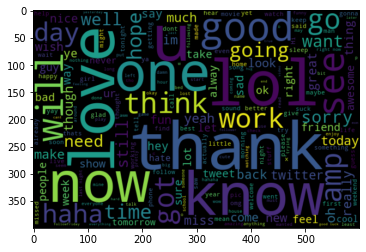

In [30]:
allwords = " ".join([word for word in df["SentimentText"]])
wordcloud = WordCloud(width = 600, height = 400, random_state = 420, max_font_size = 120).generate(allwords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.show()

## Defining to functions to return the polarity and subjectivity of the tweet

In [31]:
def polarity(txt):
    return TextBlob(txt).sentiment.polarity

def subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

## Creating 2 new columns in the dataframe and filling it with the subjectivity and polarity respectively

In [32]:
df['Subjectivity'] = df["SentimentText"].apply(subjectivity)
df['polarity'] = df["SentimentText"].apply(polarity)
df

ItemID  Sentiment                                      SentimentText  \
0           1          0                        is so sad for my APL friend   
1           2          0                      I missed the New Moon trailer   
2           3          1                            omg its already 7:30 :O   
3           4          0             Omgaga. Im sooo  im gunna CRy. I've...   
4           5          0           i think mi bf is cheating on me      ...   
...       ...        ...                                                ...   
99984   99996          0    seems like a repeating problem   hope you're...   
99985   99997          1   arrrr we both replied to each other over diff...   
99986   99998          0                                   ya i thought so    
99987   99999          1      Yes. Yes. I'm glad you had more fun with me.    
99988  100000          1                                   haha yes you do    

       Subjectivity  polarity  
0          1.000000 -0.500000  
1          0.454545  0.136364  
2          1.000000  0.050000  
3          0.000000  0.000000  
4          0.000000  0.000000  
...             ...       ...  
99984      0.625000  0.500000  
99985      0.366667 -0.041667  
99986      0.000000  0.000000  
99987      0.566667  0.433333  
99988      0.300000  0.200000  

[99989 rows x 5 columns]

## Defining a function ot get the sentiment based on the polarity

In [33]:
def getSentiment(polarity):
    if polarity < 0:
        return "Sad"
    elif polarity > 0:
        return "Happy"
    else:
         return "Neutral"

## Applying the getSentiment function to all the tweets in the dataframe

In [34]:
df["Sentiment"] = df["polarity"].apply(getSentiment)
df

ItemID Sentiment                                      SentimentText  \
0           1       Sad                        is so sad for my APL friend   
1           2     Happy                      I missed the New Moon trailer   
2           3     Happy                            omg its already 7:30 :O   
3           4   Neutral             Omgaga. Im sooo  im gunna CRy. I've...   
4           5   Neutral           i think mi bf is cheating on me      ...   
...       ...       ...                                                ...   
99984   99996     Happy    seems like a repeating problem   hope you're...   
99985   99997       Sad   arrrr we both replied to each other over diff...   
99986   99998   Neutral                                   ya i thought so    
99987   99999     Happy      Yes. Yes. I'm glad you had more fun with me.    
99988  100000     Happy                                   haha yes you do    

       Subjectivity  polarity  
0          1.000000 -0.500000  
1          0.454545  0.136364  
2          1.000000  0.050000  
3          0.000000  0.000000  
4          0.000000  0.000000  
...             ...       ...  
99984      0.625000  0.500000  
99985      0.366667 -0.041667  
99986      0.000000  0.000000  
99987      0.566667  0.433333  
99988      0.300000  0.200000  

[99989 rows x 5 columns]

## Neutral Tweets

In [35]:
for i in range(df.shape[0]):
    if df["Sentiment"][i] == "Neutral":
        print(df["ItemID"][i],df["Sentiment"][i],df["SentimentText"][i])

4 Neutral            Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11 I was suposed 2 just get a crown put on (30mins
5 Neutral          i think mi bf is cheating on me       T_T
7 Neutral        Juuuuuuuuuuuuuuuuussssst Chillin
8 Neutral        Sunny Again        Work Tomorrow  |       TV Tonight
9 Neutral       handed in my uniform today . i miss you already
10 Neutral       hmmmm i wonder how she my number 
22 Neutral     wompppp wompp
25 Neutral      Headed to Hospitol : Had to pull out of the Golf Tourny in 3rd place I Think I Re-Ripped something  Yeah THAT 
29 Neutral    goodbye exams, HELLO ALCOHOL TONIGHT 
30 Neutral    I didn't realize it was THAT deep. Geez give a girl a warning atleast!
33 Neutral    Meet your Meat 
34 Neutral    My horsie is moving on Saturday morning.
35 Neutral    No Sat offNeed to work 6 days a week 
38 Neutral    times by like a million
39 Neutral    uploading pictures on friendster 
41 Neutral   &amp;&amp;Fightiin Wiit The Babes
43 Neu

2524 Neutral  i don't even know.
2529 Neutral  I dont have lunch money
2530 Neutral  I don't have the guts,
2531 Neutral  i dont know how to do that fringe braidy thing 
2532 Neutral  I don't know what my problem is
2533 Neutral  I don't know
2534 Neutral  I don't like cleaning
2535 Neutral  i dont like it when people dont text back ~Tim~
2538 Neutral  I cant find my connector for my cameraa  Where is itt
2539 Neutral  I cant get ma rarse outa bed. I NEED 2 get sum work done!
2540 Neutral  i cant get photos to save for my twitter layoutargh
2542 Neutral  I can't open my YM account ! Grr.
2543 Neutral  i cant sleep, i dont deserve this  N you know it 
2544 Neutral  I cant take the hurt
2547 Neutral  i cant upload my pic
2551 Neutral  I could go to Italy in that time
2553 Neutral  I cut my hair
2554 Neutral  I didn't get picked for any show Boehoe!
2556 Neutral  I do look like luda, ugh.
2558 Neutral  I dont know how to get the output type from nast and tsp01 tables but tomorrow i will f

5385 Neutral followfriday     Some of my favs 
5386 Neutral followfriday  because he has said he will keep us informed over the summer re Champ the Lake Champlain monster! 
5387 Neutral followfriday  because she is only 7044 on twitterholic.com and we should help her improve that score 
5388 Neutral followfriday    4 the antipedian experiences    4 the male view   4  
5390 Neutral followfriday  
5395 Neutral FollowFriday   She's my virtual drinking buddy!   Come join the party 
5396 Neutral followfriday  although she doesnt consider me a sweetheart to 
5397 Neutral followfriday  ;you wont regret it 
5400 Neutral followfriday       coz they are FAB tweeps  xxx
5403 Neutral Followfriday  Pug, , . , , ,  
5406 Neutral followfriday        (via ) Thank you 
5411 Neutral FollowFriday ~ EVERYONE. I don't want to miss ANYONEI â¥ you ALL So, take THAT personally please 
5412 Neutral followfriday ~ FOLLOW YOUR BLISS 
5414 Neutral followfriday and for the Brightonians   
5416 Neutral followfrida

8246 Neutral  this job blows. *deep breaths clayton*
8248 Neutral  this means you!
8252 Neutral Volvicchallenge Tesco dropped off my 14 bottles today  Props for doing so on a Bank Holiday
8257 Neutral wccamp  sending us back to pencil and paper camp 
8258 Neutral wcchicago is starting! 
8265 Neutral webmission thks , check that vid!  
8272 Neutral whocangetit  
8274 Neutral whocangetit David Banner 
8275 Neutral whocangetit Why me of course! 
8276 Neutral whocangetit yur mom 
8278 Neutral whyITweet  we tweet to let the world know about our yummy cakes 
8281 Neutral WhyITweet coz i can 
8282 Neutral whyitweet I tweet because it keeps my mother in the know without me answering 50 million questions every time I see her 
8283 Neutral WhyITweet I tweet to procrastinate. I have an exam tomorrow, yet I'm on twitter 
8285 Neutral &quotOMG . Transformers comes out tonite ! . I'm trying to wait till the weekend  And I will Still at wrk tho. 
8286 Neutral &quot   TV? gombeto.comp=357 by      
828

11850 Neutral *attempts lemon lysol floor cleaner in dishwasher*  Coulda sworn I got a box of Cascade yesterday but I can't find it. 
11851 Neutral *â¥* Twitter is so confuddlin me  *â¥*
11854 Neutral *back to web* 
11855 Neutral *barstow* - can't delete any entries from the phone. eta 5:00am (its 8pm) 
11858 Neutral *blankstare* w/thumpssss and thoughts 
11859 Neutral *boo hoooos* my throat is soreand no-one cares   *sniff sniff*
11862 Neutral  Im saying chau should shut uptwitter style! 
11863 Neutral  oh snap-Conan returns to my tv on Monday. 
11866 Neutral  Feeling shitty.  I need a hug or maybe a big pile of money.
11875 Neutral  Oh snap I forgot today is PAYDAY 
11877 Neutral  IN GOD WE TRUST Belive THAT ? I COULD GO ON FOREVER Y Knows  SO I'LL SHUT UP AND LET My Country SPEAK - They LOUDER 
11878 Neutral  Omg Shut up birds, the sun isn't even up yet. 
11879 Neutral suzy) now that neighbors have shut up (finally) i might try and go to sleep again 
11880 Neutral  Would appear no

15496 Neutral *sigh* think i'm getting a headache. 
15499 Neutral .been doing nothing 
15502 Neutral .im gaining weight 
15506 Neutral .my body hurts. 
15507 Neutral .net 4.0 rocks  just can say dynamic 
15510 Neutral .RIP James E. Tritt, father of Travis Tritt our prayers will b with u 
15515 Neutral .woohoo. coLLege suspended. start of class june15 yeheeyy  
15516 Neutral /  you rub the lotion on the skin in order for it to upload &amp; eat some cheese &amp; bread while drinkin' that drank you call liquor 
15518 Neutral / LOST HER JONAS BROTHER'S TICKETS 
15522 Neutral  Powered by caffeine &amp; trance music; drowning in work  
15527 Neutral what else is there too it i wish i could know 
15528 Neutral I don't understand twitter 
15531 Neutral /i want to go to reading or leeds 
15532 Neutral /just woke up 
15533 Neutral /me got rejected 
15551 Neutral still up.  
15552 Neutral STILLL SAADMAADhaven mixed emotions  I REEAALLY dont wanna leave my pplz. I LOVEE YOU GUYS  ;3
15553 Neutral 

18709 Neutral @ workIRRITATED UGH can't wait to get home to have a beer 
18710 Neutral @ worki miss lake travis   
18711 Neutral @ Worklooks like sombody's got a case of the MONDAYS 
18714 Neutral @asot400 this song is siiiccckkkk 
18718 Neutral  schoollast study group sesh before i head into finals lets get that degreeehaha. k FOCUS! 
18720 Neutral @ and the same to you!  
18722 Neutral g I was trying to rap 
18724 Neutral Dave I am 
18727 Neutral radioactivex i think i myt listen to one for the radio that song haz a buzz 
18728 Neutral sid i call you like a million times today 
18740 Neutral : maybe we could hold hands, if you were my boyfriend 
18746 Neutral : Oh dear until this hour, I have not start doing my SOP No hope le 
18747 Neutral : okeeiiii it's time for holidayy come on novels and dvds, come to mama 
18748 Neutral : pasta w/ extra spicy tomato sauce, vanilla coke and lots of trashy tv. I like  Feels like student days though!
18752 Neutral : R.I.P. Finland   and will a cou

22407 Neutral mStew maybe  but I have some bigish news
22412 Neutral Nancy_ Helou 
22414 Neutral Nanu_ Yeah, scan my chest.  SOme women dig that.
22417 Neutral nataly What alguÃ©m falou en RNR Coaster? Qdo eu ouÃ§o Aerosmith dÃ¡ vontade de chorar de saudadethere's a hole in my soul&quot 
22419 Neutral natearchibald anytime 
22423 Neutral nathy who do I have to kill, wifey? I miss you!  So does Peach and his/her pussy. We need a lesbian orgy like w 
22426 Neutral  YUM!   Going out or staying in?
22432 Neutral  why? 
22434 Neutral  Working for someone else this summer 
22438 Neutral  Thank you ladies  for the FF 
22439 Neutral  thats retarted  i give you a heart and you give me oursteh1337  *tear*
22443 Neutral  mornin' to ya too!  It is night for me  so I am off to bed.  Hugs my British friend  Say hello to England for me 
22444 Neutral  bully just cause im dyslexic 
22446 Neutral   wheres my present? 
22447 Neutral    thank you 
22448 Neutral  big island  where u going?
22450 Neutral  

25610 Neutral  Like that 
25612 Neutral  
25613 Neutral  Hallelujaaaaah let the sun shine 
25615 Neutral  sowieeI think mic had a problem with their internet connection 
25616 Neutral  damn! i can't go! 
25618 Neutral  i have no idea, i just wanted to ask 
25621 Neutral  Send me the addresses &amp; emails today plz 
25625 Neutral  yes, me too 
25628 Neutral  me? 
25629 Neutral  Then keep remindin me cuz I got a memory of a gold fish 
25630 Neutral  Weeeh sweetie 
25638 Neutral  no rehab for me- I am still in the denial stage        
25640 Neutral  mercy buckets 
25643 Neutral  where did you see Addekk crossover talk? 
25646 Neutral  I got no time 
25647 Neutral  hi, how are u? 
25654 Neutral  No, help is NOT on its way! I have to wait till tomorrow! I want to cry. 
25656 Neutral  tell me about it!  this is what you get for being such a procrastinator.
25657 Neutral  I'm just trying to be the kuya that leah never had, thats all. 
25661 Neutral  I guess I am not one of your fav friends. 

29364 Neutral  Spurs suck! GO MAVERICKS! 
29370 Neutral  visiting my mom 
29372 Neutral  madmex margaritas without you last night 
29377 Neutral  omg, you and that phone 
29379 Neutral  not at all 
29385 Neutral  Hey, come on! It's not Catholicism, no need to worry! 
29387 Neutral  something like that.  and if i can have my way with it, maybe it will unload itself tomorrow.  hrmm  
29389 Neutral  Yes! I saw them on The Bard's Tale 04 
29391 Neutral  you dont have Night at the Museum 
29392 Neutral  ha the maine 
29393 Neutral  anywho How are you treating my friend? I miss her too 
29396 Neutral  check this out the coolest wedding invi ever. GokillllllWhy we never did this for our wedding  tinyurl.com/nvx4g8
29397 Neutral  this is so distressing to me 
29400 Neutral  For the link to the hotcakes recipe.  
29402 Neutral  Let's wait for the next generation hybrids, rolling out in 2010 me thinks? 
29407 Neutral  darn I missed that 
29408 Neutral   I wanna see that, too.
29412 Neutral  How 

33191 Neutral   match with DT TN (HIV/AIDS) in LC UI TN-In-ID-UI-2009-1347 &amp; TN-In-ID-UI-2009-1349 DM Me 
33192 Neutral   match with DT TN (HIV/AIDS) in LC UI TN-In-ID-UI-2009-1347 &amp; TN-In-ID-UI-2009-1349 DM Me 
33204 Neutral  Guess why? 
33205 Neutral  I have skeeter bites all over my legs and feet  blast A&amp;F for their Only FlipFlop rule 
33206 Neutral  im going to bed too. Nitey nite   and everyone. 
33207 Neutral  any reason why you have not eaten anything yet? 
33211 Neutral  Me too 
33217 Neutral  ì ê° ëë¬´ í¸ë¤ê°ì? ë¨ìëì? ^^; ë¤ë¥¸ í´ì? ë§ì? ê¸°ë¥ê³¼ ë¬´ê±°ìë§ ë³´ë¤ê° ì?ëì ?ì¼ë¡ ë¨ìí Muninì? ë³´ë ë¹êµ?ê° ë?ê¸°ë íë¤ì. ë­? ì¥ë¨ì ?ì?´ ìê² ì£  
33218 Neutral  I could have used your help this weekend. Was fumbling around with flash and taking lots of photos under pressure. 
33220 Neutral   project design à¹à¸à¹à¸?à¸à¸µà¹à¸à¸µà¸à¸µà¹à¸¡à¸«à¹à¸­à¸­à¸?à¹?à¸à¸à¹à¸£à¸à¸à¸¢à¸²à¸à¸²à¸¥à¸?à¸³à¸¥à¸±à¸à¸à¸³à¹à¸à

37091 Neutral : give me a call when u can! 
37092 Neutral  i don't think so 
37094 Neutral  kill me please I don't know what to bring  so stressful!
37096 Neutral  i miss you roomie 
37098 Neutral  I want a japadog with you. Leah my lover is leaving tmr 
37099 Neutral   ahhh the vagaries of travel in the EU. Which airline/air traffic controllers/etc are on strike this time? 
37102 Neutral  OHNO! 
37108 Neutral  uhhh after I get off wk umm which is 4 or 6 iill def let u knocauseeee we gotsuhh  and I spelled ur ish wronggg cuz I'm drivin
37116 Neutral  you can't say I'd get rid of her TO her. plus, I think it's only the team leader who can get rid of me, so not happening 
37123 Neutral  Np if I happen to find anything else out I'll let you know 
37126 Neutral     got a water leak 
37127 Neutral  I dont know any coin codes  DANG
37128 Neutral  yeah, sweetsthe camcorder WAS you your cashier number was all over it. 
37129 Neutral   Maybe so, but I'll also chat afterwards, so it evens out.
3

41161 Neutral  that's craziness.  Especially on a weekend, I think.
41167 Neutral  have the music pumping in the car, that will get you there quicker 
41168 Neutral  We leave a week from today 
41169 Neutral   The link won't open. 
41170 Neutral  I freakin looove The Guess Who. Thank you 
41179 Neutral  well done! you alright? im going to go in the garden  xxx
41180 Neutral  have another for me 
41181 Neutral  if you say soo jk 
41187 Neutral  sun just walked away with tripple their stock value 
41194 Neutral  maybe we should do a cricket theme to make up for the lack of baseball in Australia.  ff.im2yxmD
41197 Neutral  mann. i wish i could've gone! 
41198 Neutral  I hear there are some startender guest sessions Thurs? So may go then too 
41199 Neutral  and the Broncos lost too! 
41200 Neutral  you just keep telling them that   Posting the fastest TT at CGC Champs out of all categories 
41208 Neutral  why at the airport if your not going anywhere? 
41211 Neutral  Hey Andrew.  Still hav

44601 Neutral  I just looove skins! shame that 3rd series is over 
44604 Neutral  Oh yes, he is handsome  His name is Artur  But He has a girlfriend So sad 
44607 Neutral  Yeah, such a shame   Did you see the movie Control&quot
44610 Neutral  hey, it's emmah from myspace 
44618 Neutral  what's he trimming Your lady garden   Christ I can't stop me self 2day 
44619 Neutral   No change there then 
44620 Neutral   annaaaa!  fez twitter quando, meninaa  beeijo
44628 Neutral  Msn's acting up 
44629 Neutral  Omg.  Aww. May he Rest in Peace.
44630 Neutral  yea it seems that Lady Gaga is at 1 again. 
44632 Neutral  well, you can print CY_K not CYMK 
44635 Neutral   are you gonna answer ?  hahhaa 
44636 Neutral  whered you left your blackberry? 
44638 Neutral  hey yawww 
44644 Neutral  and now they have to come out 
44648 Neutral  noah &amp; me are the only ones w/ computers and noah wont let me use hers 
44653 Neutral  bye anne speak soon. take care 
44655 Neutral    goodmorning! 
44659 Neutral

48254 Neutral  Will wait for iPhone 3Gs to launch and see. Hopefully by then the 3G version would be cheaper. 
48257 Neutral  thank you Alvin! 
48260 Neutral  tiff liang 
48262 Neutral  is amazazing! I miss her. 
48264 Neutral  Do Not Restate 
48269 Neutral  2 beers later and I'm def not. 
48271 Neutral  heyyyyyy. i miss you. come chat. 
48272 Neutral  With this economy, I imagine only super-established writers are even getting considered. 
48275 Neutral  morning 
48276 Neutral  yes that too. 
48277 Neutral  aw  beamed me up= hit me up/ messaged me 
48281 Neutral  5:25 is my appointment. for orthoooo.  wbu? what timeeee?
48282 Neutral  i second that 
48287 Neutral _n I heard about that too that seems an overreaction 
48291 Neutral  agree 
48294 Neutral  thank you for the follow 
48297 Neutral  we miss you bro 
48298 Neutral  oh, yeah!  Definitely!  
48309 Neutral  there's sth I need to ask. Yay for James! 
48313 Neutral  Hhaha, then its doing its job 
48314 Neutral  I'm listening to mu

51882 Neutral  I want to hang out with you in Vancouver, Canada 
51884 Neutral  QueenBee is a movie, and they are searching for the movie representative 
51892 Neutral  I'll be back Monday  but the then leave for California on Friday, we can Thursday!
51893 Neutral  how's the beach weather I'm goin on Sunday bc I can't see my daddy 
51900 Neutral  It was what our pediatrician recommended, mailing them to a family member. We're the ones trying to ditch them, she LOVES them 
51902 Neutral  - i'd like to see that!  
51903 Neutral  I suspect that it's a result of lactose intolerance. 
51904 Neutral  i want a pzone AND a slush 
51905 Neutral  yeah the closest store is 1.5 hrs away in Va Beach  - you should get a store on Eastern Shore, Virginia!
51907 Neutral  Ha I wish I could! and morning   tis sunny here as well
51908 Neutral  thank you - my brain hurts from thinking and i can't sleep 
51913 Neutral  thank you for entering the fancy fortune cookie giveaway &amp; tweeting 
51915 Neutral  

55680 Neutral  follow  &amp;  
55681 Neutral   - I need cash 
55689 Neutral  babyyyyyyyyyyyyy you join in 
55696 Neutral    tinychat.com/w95ok come chat! 
55700 Neutral  Who cares? It's your life 
55702 Neutral  no i didnt get no doubt kimmel ticket  but i have to work that day probaby
55708 Neutral   I LOVEEEEEEEE YOUU mwahh 
55709 Neutral  Me too  They keep deleting my vids.
55713 Neutral  Congrats on all the followers 
55720 Neutral   hide your kittys 
55721 Neutral  This rain is killing me too 
55735 Neutral  nooooooooooooooooooooooooooooooooooooooooooo i was soo looking forward to that 
55737 Neutral  really? have u tried it? mmm, green tea 
55738 Neutral  Almost a thousand dollars. 
55739 Neutral  Homagawd you gone lost yo mind 
55745 Neutral  I actually listened to that songproud of me? 
55749 Neutral  When do u want the money? show me the place cause i want a blue one too 
55752 Neutral  ahhh goodluck  where you off to? xx
55754 Neutral  babyyy please let me know where will you

59308 Neutral  roarr maybe god is telling me to stay away from twitter 
59309 Neutral  para ow, minha coberta do rocket power Ã© muito sensual seduction 
59310 Neutral  www.hangiotel.com 
59315 Neutral  I thought I was, but it doesn't look likely my pass hookup fell through. 
59318 Neutral  there's never an overload when you're charging 
59319 Neutral  At Â£450 as there is currently no upgrade option I think not!  I need to wait until January 
59320 Neutral  With kids underfoot, sleep is definitely a luxury! Grab all you can, while you can. 
59321 Neutral  Methinks CRG wouldn't let him come back anyways  We're stuck w/ Willie who just lost the 1 CB in GA to Yech
59326 Neutral  I don't know too  I was checking people I follow tapos wala cya  when I checked wala he deleted it 
59331 Neutral  Im staying home for lunch. no money 
59332 Neutral  
59338 Neutral  Why not? 
59340 Neutral  unwinding with hmmm vodka  
59342 Neutral  I would enter the TweetGenius contest but it just came up on my

63200 Neutral  are you buying tix for the indy blink show? my moms card is maxed and cant buy them 
63201 Neutral  Looks like it only effects people with the eMusic Plus plan which would be me  sonyfail
63208 Neutral  Any way to resize the window of Blu at all? Will this feature come out soon? 
63211 Neutral  I'm starving but in one of those moods where I can't decide what I want so I'll go without for longer 
63220 Neutral   *hugs*
63221 Neutral   vodafone is looking nicer all the time
63226 Neutral  Been there tried that. My laptop runs vista 
63228 Neutral  Ah no! It's sold out, though 
63229 Neutral  Connie   Omg i havent spoke to you on msn forr agesss ! :L x   Hows life?
63233 Neutral  In that case, we may as well get a case. It would have to be a non-wheaty beer; otherwise, I would be doubly punished. 
63241 Neutral  I feel so depressed just watching their concert videos. 
63242 Neutral  no coffee then?  meany!
63246 Neutral _ mmm psychedelic! i like. tell me if you've got any g

66747 Neutral  one way convo per twitter rules 
66761 Neutral  Mass Effect, Mass Effect, Mass Effect, Mass Effect 
66762 Neutral  i wish for the ability to teleport 
66766 Neutral   fingers crossed if i get the job  i forgot to give you peppermint pattie on saturday night 
66768 Neutral  Give it a try, if anyone asks tell them you're looking for your contact 
66770 Neutral  NEXT SEMESTER WE WILL FIND ALL THE STRAIGHTS I PROMISE 
66771 Neutral  hahahahaaa.  are ya gonna go to church wednesday? Dufflebag 
66774 Neutral  wellOKyou can carry on then.  Dinnertime over now anyway 
66775 Neutral  Yea that rings a bell. I think I decided to stop having baths all together to save water in 1976 
66778 Neutral  I didn't know that was next week.  Hmm I might actually be in seattle next week.  I should run up huh.  
66785 Neutral  if I didn't pee myself on a regular basis, I could say the same 
66786 Neutral  Me too 
66789 Neutral  apparantly I needed to adjust something on my receiver it works now

70328 Neutral  i would except it is a church trip.  come with me next year!
70331 Neutral  OMG. I don't think I'll be here 
70332 Neutral  and Im thinking the closest i'll get to them is 4th row in Indy no 5* for me 
70333 Neutral  i see that 
70336 Neutral  well count me in on that celebration 
70339 Neutral  omg one of the followers I got to follow u stopped following me and kept following you. 
70344 Neutral , Oh that's me. 
70345 Neutral , You penis. 
70346 Neutral  ohhh. That would explain a lot 
70347 Neutral   Woof, woofwoof arf woof ork woof Mucinex.  -that was bark for  I'm sorry baby I hope you feel better after the Mucinex
70348 Neutral  Go on girl PREACH let these men know what women like 
70349 Neutral  how was ur date last night? u wish it was me huh 
70351 Neutral  same as ATL shawty.  5:57 am
70352 Neutral  one of those days. 
70353 Neutral  That's ass.  If you want to talk about it you can text me.
70354 Neutral  on phone @ workcan't view it 
70358 Neutral  I wanna go 

74362 Neutral  use 'find' instead? 
74365 Neutral  I logged in to see this clip of Susanwhat a gift just to hear her sing. Thank you for your post. 
74367 Neutral  I like it, personally  Especially if some whores stole  and   =X
74369 Neutral  I wish I had the power of teleportation 
74379 Neutral  we r like mac&amp;cheese(im th cheeze of course)fish&amp;chips and so on(i ran out of &amps) hee luv ya DREW. 
74380 Neutral  im goooood, so boringggggg. yeh we shud defo b on da beach  like fools we are!
74383 Neutral  we missed you yesterday! 
74384 Neutral  I had three photobucket accounts and deleted one, but I had some WAS .gifs on it that I didn't have saved anywhere else. 
74385 Neutral  Laptops &amp; Trek - you guys are bigger nerds than I ever imagined. One of us!  One of us! 
74387 Neutral  no problem, hi to you anyway 
74392 Neutral  I can hear thunder but see no lightening! 
74394 Neutral  and with a chocolate taste, no? 
74398 Neutral  In about 20 days! 
74402 Neutral   So can r

77762 Neutral  Yay! I'm so jealous 
77763 Neutral  i left in on the key board 
77765 Neutral  you &amp; i both  sooo boreddd
77768 Neutral  I will definately try. Look out for my tweet around midnight. Warning: it's melancholic depressive music. 
77778 Neutral  I was walking home when he fell to the ground 
77785 Neutral  was watching the series LOST hence the update 
77786 Neutral  yeaas compres draw closer, homesickness creeps in  
77787 Neutral    Thank you! Yep it's today! I happened to be in a pub on the stroke of midnight  (What are the chances
77793 Neutral  And this one  - 
77795 Neutral  i've read studies that adding lemon or lime to your water helps in flushing out toxins from the body. another bonus! 
77797 Neutral  AGREED! 
77801 Neutral  thanx shes on my sisters lil girls twitter 
77802 Neutral  Wish I could have seen it, but didnÂ´t had the chance yet since IÂ´m in Germany. 
77804 Neutral  awman,  boomer! or maybe he'll dump her for you 
77810 Neutral   I know you dont wa

81577 Neutral  I do but its not DVD copy eh. 
81579 Neutral  Did you see the Mr Brightside? 
81580 Neutral  I THINK I ONLY WENT OUT LIKE, 5 TIMES. I DON T KNOW. :| I WANT TO GO OUT. W  AND YES, I DON T WANT SUMMER TO END YET. 
81583 Neutral  I don't know lah 
81584 Neutral  sup! Missed you guys a couple of weeks ago   I've been suck up here with only two wheels. How you guys been?
81588 Neutral  you said : hi plzz tlk  so that was my reply.r0fl
81590 Neutral  - Me &amp; BowWow614 are CO Boys  I could let you take a shot at his Chick Choice unless YOU can Validate Your Sexy-Fly 
81592 Neutral  have you not been watching CSI:NY? they have a holodeck already 
81596 Neutral  you gotta take care of youwe all understand 
81597 Neutral  hmmm. That's a lot of responsibility.  
81606 Neutral  OMG. Yes, let's make outhang out. NOW. 
81609 Neutral  on opening day?  Let me know. I miss running.
81612 Neutral   yo holly i cnt get it up on youtube  its only on my facebook. soooooooyah.
81617 Neutral

85193 Neutral   Won't play.
85197 Neutral     i'll miss you boo
85200 Neutral  you were here in the Bay I didn't get to see yaz 
85203 Neutral  Are you here? 
85206 Neutral  its truee xD &amp;yyuup  i bought 'em yesterday as i said so xD
85212 Neutral  You didn't do the trip to Chicago for symp09 ?    Robbed!  Make up for it with a trip to Sydney instead  
85215 Neutral  no such thing 
85216 Neutral  Petitions: Electrik Red P Is For Power BET Access Granted www.petitiononline.c twitition.com/f5iae Sign pls 
85217 Neutral  I had one until a week ago, then a pigeon took a dump on it I had to throw it out. 
85223 Neutral  shush ur mouth woman 
85226 Neutral  they had passes for that?   aw
85230 Neutral  Get 100 followers a day using www.tweeterfollow.com Once you add everyone you are on the train or pay vip 
85234 Neutral  i want to play! no xbox 
85236 Neutral  especially when its a recording and the sheet music is on the powerpoint 
85242 Neutral  I look forward to hear the *BANG* 
8524

88683 Neutral  Chelsea I am gonna die from boredem and my headache 
88686 Neutral  HP 6. I saw the movie preview and was like I so don't remember that part so now I'm reading it again. 
88692 Neutral  WHAT ! can people even get that anymore ? oh babyyy I hope you're okayy 
88694 Neutral  I am located in Milwaukee, Wisconsin - land of beer and cheese! 
88697 Neutral  my pleasure! 
88706 Neutral  go chelsstick it! 
88707 Neutral  only made out? 
88712 Neutral  No! He left the band 
88716 Neutral  did your your show sell out? 
88721 Neutral  I can't believe I missed this 
88724 Neutral   I might have to tag along with y'all to CSTS then  I msged  about it but haven't heard back.  hint hint
88727 Neutral  In passing you may have 
88732 Neutral  screw u hippies! We're gonna have meat lots and lots 
88735 Neutral  heya! I found you through . I'm doing Vulcana's year-long artsworker training program 
88740 Neutral   are you 11? 
88743 Neutral   OH NO!  but prob hahah
88747 Neutral  : yes! I'm

92680 Neutral   I am.   $350 in 2 days (not so shabby)  Just trying to  get some for all the  concerts
92681 Neutral  Congrats! You've won $100,000 Pyramid! Actually, it was a Flight of the Conchords reference. 
92682 Neutral  The sun disappeared 
92688 Neutral  Sounds like a job for Google Wave Gadgets  (Alternatively, Google Moderator or Spreadsheets also do the trick)
92698 Neutral  but we won't have a computer for a week after tonight   
92701 Neutral  I'm working up here  it's a summer camp just for June
92702 Neutral  I wish I was theree 
92703 Neutral  what year is your lotus, (searching ebay for a deal 
92710 Neutral  we gon be there man. I see you guys are already on the way. Im following 
92711 Neutral  wait, got it 
92713 Neutral  still posting to spaotp i see. i thought you where meant to be on holiday 
92716 Neutral  there was no mention of it, so: no. Usually only when htc says that participants will get one later, it is sent. So: no 
92718 Neutral  When  Smokey came on s

96231 Neutral  o dam my b famaint kno it was raining 
96237 Neutral  oh no 
96242 Neutral  I dont ! Broke 
96243 Neutral  I only went to a bazaar! 
96245 Neutral  you've only just noticed 
96246 Neutral  ckckck Party on sista' 
96247 Neutral  ah that explains it I got the regular one. Still think I should have gotten a bonus disc or something 
96248 Neutral  I didn't get one 
96251 Neutral  hiaah iya deeh 
96253 Neutral  Get 100 followers a day using www.tweeteradder.com Once you add everyone you are on the train or pay vip 
96254 Neutral  had a Z1 900,twin webers,yosi kit, it flew 
96257 Neutral  hope the session went well!  don't forget to share the pics 
96261 Neutral  Get 100 followers a day using www.tweeterfollow.com Once you add everyone you are on the train or pay vip 
96264 Neutral  It's not on here, just the local news.  
96265 Neutral  I canÂ´t receive E! in Germany  but I will search the video in the internet 
96267 Neutral  ugh we don't have 1 n Birmingham 
96270 Neutral  

99840 Neutral  oh no! 
99843 Neutral  I already did 
99848 Neutral  Hello, did you stop using Facebook ? 
99851 Neutral  Get 100 followers a day using www.tweeteradder.com Once you add everyone you are on the train or pay vip 
99852 Neutral  greaaat, do minee now pleaseeeeee 
99853 Neutral  who knows!  soon i hope i heart him.
99857 Neutral  Just wait till you have to unpack. 
99859 Neutral  only sundays I will miss you 1 besote Crystal 
99861 Neutral  no it doesnt    ~Jax~
99863 Neutral  the landlord is selling it so i need to move 
99864 Neutral  wellll whatever works. lemme know. 
99865 Neutral  i can't wait till ur back i miss you 
99868 Neutral  Your HighnesscrystalmarieDONTluvSpiteAnymore 
99870 Neutral  You guys are tweetaholics. 
99872 Neutral  don't worry its only presale 
99874 Neutral  aahhh! lend me! i didn't get to grab the last one. the last one sophia grabbed. 
99877 Neutral  Still cannot create an instance of my report in VS. Created Virtual Directory for Viewer and goo

## Positive Tweets

In [41]:
for i in range(df.shape[0]):
    if df["Sentiment"][i] == "Happy":
        print(df["ItemID"][i],df["Sentiment"][i],df["SentimentText"][i])

2 Happy                    I missed the New Moon trailer
3 Happy               omg its already 7:30 :O
6 Happy          or i just worry too much?        
11 Happy       I must think about positive
12 Happy       thanks to all the haters up in my face all day! 112-102
13 Happy       this weekend has sucked so far
14 Happy      jb isnt showing in australia any more!
15 Happy      ok thats it you win.
16 Happy      This is the way i feel right now
18 Happy     Feeling strangely fine. Now I'm gonna go listen to some Semisonic to celebrate
20 Happy     I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over.  is happy in the meantime.
23 Happy     You're the only one who can see this cause no one else is following me this is for you because you're pretty awesome
28 Happy    Feeeling like shit right now. I really want to sleep, but nooo I have 3 hours of dancing and an art assignment to finish. 
32 Happy    i miss you guys too     i think i'm wearing ski

2168 Happy  guys the mouse isn't a hallucination. He's a real, fuzzy, whiskery thing. How do i get rid of it without killing it?
2169 Happy  H&amp;M dress don't fit It was really cute (n cheap) too  The cheap part is what  breaks my heart
2170 Happy  Ha I love you too betch.
2172 Happy - had a great time at the 'block party' - so did mackenzie 
2173 Happy  had a not so good day. . . but I have faith
2174 Happy  Had a really fun afternoon, and probably have a wicked sunburn xP It was so worth it. Nick left a few minutes ago. Surfing the web 
2178 Happy  haha dating the enemy!
2179 Happy  Im so weak right nowi thought i had finally found my happy ending
2193 Happy  I'm trying to do my FTV assignment. I REALLY suck at written pieces, I have no idea on how to structure everything 
2196 Happy  Im watching vids of Enter Shikari wanting to go to their signing 2morow. might just go on my own and sit oustide hmv all day like a hobo
2198 Happy  in n out closed the door in my face but its ok sum 

4203 Happy  your welcome
4205 Happy - you're welcome  aweber.com/b/22u8Z
4208 Happy  yup yup life is goooooood again finallyi guess the saying is true sometimes to take one step forward you do have to take two back
4209 Happy  Yx is ok. Evn thy saw an acdnt. She is ok. Good to hear frm her.
4212 Happy ! am off to eat swiss food! shall be fun   good to spend a night with the boys ;; /out
4213 Happy ! I need a new graphics card if I want The Sims 3!    !
4214 Happy ! RB  : &quot Its a Brand New Day already! Time to leave the dance party!    GooD Morning ? blip.fm7b9sk
4228 Happy  My sunglasses are full of Ben&amp;JerryÂ´s 
4239 Happy  need new group.
4242 Happy  never drinking again Famous last words it says with it's headache / hangover.
4244 Happy  New follower! Thx 2 u Ye 4 day weekend started friday last day 2mozz. Nothing 2day computer
4245 Happy  new paramore now
4246 Happy  night all i feel funny
4252 Happy  no drama today. but thats OK coz. i super happy 
4256 Happy  no finals to

5964 Happy  Only four more episodes and Hannah and I are caught up with Heroes.
5969 Happy  our camera battery is running out. Have to be smart with what we film at netprophet
5974 Happy  Owww im hurting and I'm gonna be missing NIN/JAI wish it was being televised That be sweet!  I'm gonna miss you!
5977 Happy  paige got me to get on stickam, only for her would I EVER get on it lol It must be love.
5979 Happy  Parts of Airfrance 447 found near the coast of Senegal.
5980 Happy  peace.love and jonas! ;3 :]
5983 Happy  Phone battery finally decided to pack it in - if anyone wants my temporary number gimme a tweet.
5988 Happy  please let my uncle charlie be okay.
5991 Happy  poooooorrrlllyyyyy ouch ouch ouch stomach hurts  why am I always in pain lol
5993 Happy  poor higgenson,, get well soon good luck tonite on jimmy fallon or soemthing xxxxxxxxxxx
5999 Happy  pregnant couples are my fave
6000 Happy  Prom on wednesday - not so excited tbh.
6001 Happy  promise not cried YET no promises tho

7554 Happy liesboystell I just met my friends *sweet smile*  - yeah rite.
7555 Happy liesgirlstell  a guy calls her phone to see if the number is real ) ohh my phone isn't working . try tomorrow .
7556 Happy liesgirlstell  I just don't want to date anyone right now. Maybe later? = not interested 
7560 Happy lions Things sure not going to script in South Africa 
7561 Happy Listeningto Jump Around by House of Pain - good timesgood times 
7562 Happy location Â» Relocated from the Red Sea coast to Giza, in the apt of a friend with great view of the pyramids. No Internet though 
7565 Happy Logies Harold better win the Gold Logie haha or Adam Hills, or Rove  I hate Gretel Kileen, who ever hired her for that is an igneranous
7571 Happy maduk - Carl Taylor (3 grand ideas like Mlove &amp; esoou are against agencies lack of trust in mobile media, still 
7572 Happy madventures cheers best season yet! Parasta rokkia sitten aikoihin. 
7574 Happy marcom09 Martin from Sixtyseven has a worldwide print

9239 Happy BIGGUP to vegas What happens in u, sometimes makes it way onto myspace.      lol but really D
9242 Happy Bing is my new search engine.  I simply love it!  No more google. 
9243 Happy Bing is out www.bing.com  love the video preview 
9244 Happy Bingum.com is offering free advertising to it's members for a limited time. Sign-up and message me to get started 
9246 Happy Blink182 tickets went on sale in Phoenix. 55$ each. That is 30 dollars more then New York Tickets. WTF  should look into this 
9250 Happy bonktown had some sweet Time carbon shoes for $50 Euro 45 would have been too big 
9257 Happy bringback my mom doing my laundry  lol
9259 Happy bringback Yr 04 n 05 the most livest yrsFrom Spotlite to Flex shows to 18 n older parties wen I ain't no anybody that died 
9260 Happy britneyspears another great video   
9261 Happy I don't like Monday, i wish it were sunday, cause that's my fun day.  that was my freaking jam when i was little.   i miss it.  
9263 Happy I feel comfort

10707 Happy We're effectively destroying ourselves by violence masquerading as love -; Detto 
10710 Happy What I give to the youth, I give to all A happy nation. -Bayani Fernando on the ANC Leadership Forum ;; MAJOR LAUGH TRIP 
10713 Happy What's red and smells like blue paint?  red paint&quot    Thanks, Mythbusters!
10714 Happy When i love you a little less than before 
10717 Happy when the time is right - we can make super babies   why don't i write shit like this?  tune of the day.
10720 Happy Whispering eye    PAHAHAHAHAAAA I love Role Models ;3 Hilarious film, you should go watch it 
10721 Happy Who is that?  I don't know, but his Korean is excellent.  Lovely 
10722 Happy Who made eggs There's food if you want some, are the first words my big sister has said today to me since we moved here 
10723 Happy Who said vamps weren't funny? -watching TrueBlood 
10724 Happy Who said, I can't wear my converse, with my dress well  baby, that's just me. xD I love Demi. She totally writes the b

12417 Happy *really* wanted to tweet when Buddy was talking about Twitter during Church this morning.  But I fought that urge.  Until we left.  
12418 Happy *reallytired*  but having fun either way :p
12423 Happy *Say it Clearly and not like I said you to do it.  
12424 Happy *screams* OMG mum &amp; dad have got us tickets to see alice cooper live in Melbourne, A grade seats :O i love them sooo much  xoxo night all
12425 Happy *setting WM ROM as default* Android is fine but I don't have free time to play with it 
12426 Happy *Shake, shake, shake, shake, a-shake it* i love it 
12429 Happy *shouts* Morning thank god for waking mi up  2 see another beautiful day bout to call mi mumma miss her 
12432 Happy WISHES ELLEN DEGENERES WOULD INVITE ME TO HER SHOW  LOL.
12433 Happy &quotso we can keep the Internet as it should be open and free. Sounds good for a french guy at this time. 
12443 Happy you are the best I love you  can you give me your e-mail I want to write with you but I cant 
12444

14131 Happy belly is full from a Carnitas Tortadrinking Negra Modeloplaying catch-up. I haven't forgotten anyoneI promise 
14133 Happy UP sad movie  but still good
14135 Happy UP was quite possibly thee most random movie ever but still made me a happy girl 
14140 Happy V really dunno how to use this thigy wil get used to it hopefully   love u  muah
14141 Happy VGL 5'4 Top closes tonight 
14142 Happy wanna see a miracle? BE the miracle. - bruce almightey. home studying instead of at a st johns frat party with my biffle rhea.  how gay.
14143 Happy Wanted&quot  no human being has the right to be as gorgeous as Angelina Jolie; and why did they have to kill the innocent ratties?  
14147 Happy We love you Natalie! I WANNA FUCK YOU, TOO! - SNL is the best 
14151 Happy we'd get so excited and we'd get so scared, laughing at ourselves thinkin life's not fair. Graduation  No me gusta mucho.
14152 Happy Welcome home asshole  $1,000,000 to the person who understands that, good luck yall
14154 Happ

15783 Happy : so like, now that everyone knows what I'm doing with my life here in twitter what am I supposed to talk about in normal conversation 
15784 Happy : tagging pictures surely takes time 
15785 Happy : the CBBC channel shows are dying - what is this rubbish! Whatever happend to good old Arthur  ;3
15786 Happy : The kids' new interests include The Suite Life, Jimmy Neutron, Sonic and playing with daddy. 
15794 Happy *waves white flag* Goodnight Tweeple, I have to wake up early. Going Jet Skiing 
15795 Happy *waves* Good Night, my lovely friends.  *hugs* Hope for sweet dreams and sweeter days for you all! 
15796 Happy *waves* to any new followers oh, wait - they're all just spam   or are they?
15801 Happy *whimpers* I wants iphon 
15802 Happy *who is a marie antoinette fan! i meant. i totallly love that movie. and im watching it now! 
15805 Happy *YAAAWN* Stayed up too late last night, still gotta work &amp; get up super early tomorrow  
15807 Happy *yawn* But that's no excuse 

17437 Happy parasite  - this is so damn cuteand i just noticed how much your hair's like oli's 
17438 Happy Parasite i knowwww, when she got all rock chick jenny, i was like NUMNUMNUM haha. tell me what you think of the next epsiode 
17439 Happy Parasite that's a good episode, the next one is really good too  that reveals chuck even more i think. i hated agnes (A) !
17441 Happy SallyJo where'd you go for Rpattz day? I went to York! I didn't win anything, made me sad  lol
17443 Happy simplytrice  Id kill to weight like 215 lol. 
17445 Happy specialK   whoever you are, your super awesome! I love the music and the random thoughts! Stick around 
17447 Happy stephanie yay thanks for reminding mee i went to go follow him b4 but my comp shut down  then i forgot hehe hes soo cute
17452 Happy how about what are you *NOT* doing? that would be: doing a good job of focusing on my HOMEWORK 
17457 Happy i am so missing out right now 
17467 Happy I love my life. Good night, good morning 
17468 Happy 

19329 Happy CrC_  Is there any chance that you guys will make it out here to Hawaii? Us fans out here have been kind of left out on all the fun  
19330 Happy CrC_  LMFAO @ the banana man pic u look so hot it that banana outfit! i can barley contain myself!  hahahhaha
19333 Happy CrC_ *wink*  LOL
19334 Happy CrC_ Ahhhhhhh that is a good point cause I was all for voting for Irvine LOL where I will be 
19335 Happy CrC_ Awww The Blockheads Looove You 
19336 Happy CrC_ Good Morning! You're up and chatty this morning 
19337 Happy CrC_ Good nite! BTW: Luv ur new drums Awesome 
19338 Happy crc_ happy birthday chris  have a great day and have fun!
19339 Happy CrC_ Happy birthday to our favorite badass drummer! Have a good one! 
19340 Happy CrC_ Happy birthday to you, Happy birthday to you,Happy birthday dear Chris,Happy birthday to you!  Enjoy your day 
19341 Happy ?ang cho con hamster m?p t?p th? d?c b?ng cï¿½ch: b? vï¿½o banh ch?y lï¿½ng vï¿½ng trong phï¿½ng 
19343 Happy ?I like him very much

20820 Happy MissSmiles_ yup  its different. once u learn it u love it lol
20823 Happy MoisesArias hey you are like the coolest i love you in HMin real too 
20826 Happy Mom  all that plus baby too? You are impressive. 
20828 Happy most_ aww I feel bad about that 
20829 Happy mostwanted i want sum  lol
20830 Happy MrBrightside dont forget the tissues!  Haha
20834 Happy music_ Oh really.That is interesting!Im busy all day  ! But  where do you live because im coming to Toronto!Come if you live near!
20835 Happy musiclover27_ yup! haha 
20836 Happy N1COLA_ can I come Work is pissing me off  lol
20838 Happy nataliee Because you love me soooo much. Could you possibly download the Glasvegas cover of Be My Baby for me ?   Cheers Babe!
20841 Happy nathy internet death again?  We missed you, come for the usual lesbian orgy Y/Y? Love ya! *hugs*
20843 Happy neal yeah  and i was so excited too I guess it's not for sure that I don't have it yet, but I'm not getting my hopes up any higher
20844 Happy 

22118 Happy  GERMANY is sunny  you here   if so enjoy the sun 
22119 Happy  you will love love love Hamburg go and take a walk around the ALSTER weather is beautiful 
22120 Happy  LOL The snakes were nothing, but did you see how the cooger was trying to get a piece of my leg?  lol
22123 Happy  Babe: Wake up. Friday. Night. Too. Much Stuff.  ;3
22126 Happy  Woot! Happy Birthday I hope it's magical for you   and I owe you a big thanks  ? blip.fm63mju
22128 Happy  Good to know.  I'll report back later on my progress. Now I'm extremely motivated to finish my work 
22134 Happy  mmm indeed, enjoy 
22135 Happy  sending u good weed karma  lotta warm vibes
22136 Happy  LOL. Okay. I'll tell you when I come to it 
22141 Happy  I miss you way more than you can imagine 
22153 Happy Leva_  My iPhone changes the words as I type themI saw it after I posted ittry SINGING lol.
22154 Happy Leva_ branches/movements just serve to divide us more  Love &amp; Light
22156 Happy likeAstar  i don't get no bondin

23666 Happy  Thanks bro that means a lot  its def. gonna be a FUN summer   hopefully i'll get to work w/ YOU GUYS 
23672 Happy  No it's okay I get the gist. I assume it's not actually DM, or is he really down in funds and we're not helping him? 
23673 Happy  Got it I'm glad they're going to a good home  While I'm shipping stuff do u want a handsome minpin too haha!
23675 Happy  and also your birthday is just THAT epic. 
23678 Happy  You can't seperate the two of you! People would only get half the fun! 
23680 Happy  I have loved your stuff for a while   Glad I could pounce on this opportunity!
23685 Happy  *HUGS*  That's so true Hihaven't seen you in ages
23686 Happy  There are some great Aussie folks on here!  I know several of them. It looks to be a beautiful place!
23687 Happy  YOU BETTER    3 
23690 Happy  hahah yeah Lindsay told me you were going to the zoo this week to spot some birds! haha~ And yes I am going to the Sands 
23691 Happy  oh I have 4  and why not enjoying? Is it re

25159 Happy  Brandy u never say hey to me  I love u! Alex* lol
25160 Happy  can I get a follow or a phone call also? I adore u so much Bran! plzzzzzz 
25161 Happy  guess u made it to sleep  Well sleep well B and rise rested may u have dreams full of new music w/ a new sound all ur own
25162 Happy  gut is german for good 
25164 Happy  Lol! You look MORE Asian than they do! 
25166 Happy  Ok and maybe to for the fullmoon album 
25167 Happy  ooh that is sooo cute 
25169 Happy  Sittin On top of the world and best friend. Throw back  
25170 Happy  That's too cute. Sounds like how I would talk to my mama  She will get a hang of it!
25171 Happy  Morning! Thanks!  I've got Friesan Fire to win w/ General Quarters as my dark horse win. Either one and I'll be happy. 
25172 Happy  thats a nice shiny bottom! he looks very chilled 
25174 Happy  I wouldn't know. Apparently 22  is not a good age for first love either  Maybe 23, hm,
25176 Happy  awww thanks so much you're so nice   winslow is so much fu

26559 Happy  thanks for the follow! Montreal? I am applying to McGill 
26566 Happy melie  I love our video 2  soo funny xD and crazy ^^
26568 Happy  It's a bit like Buckingham Palace - they do it for the tourists.  Only the uniforms aren't as pretty 
26570 Happy  Well they always cut the episodes early! Totally sucks but Im glad Dean and Sammy somewhat made up! 
26577 Happy  they're wining by like 5000  yer I just like the idea of them winning! its not even australina but whatever haha
26578 Happy  so i was reading david archs twitter and he heard his song on the radio and he said it was awkward. lol. 
26581 Happy   Pauper's Dinner tonight lol Fish fingers ,chips and peas.lol 
26584 Happy  aww well I just randomly woke up and now I can't sleep! Too many things on my mind 
26585 Happy  aww  tell me how it goes and say hi to everyone
26588 Happy  Lookin' good, mate 
26590 Happy  nowhere  it's the official start of 'thesis time', the fun block from then 'till mid-Oct. LOL. Wish I was goin

27990 Happy  I still enjoyed the fight, nonetheless!   Let me know when you plan the ass kicking.  I want to film it!  
27992 Happy  In meadowhall at the apple store, So i can get a phone before school, cause if i go after they might sell out  Lol
27993 Happy  Im looking for more ppl toomost of the ppl i follow aren't on as much 
27994 Happy  and parka, don't forget the parka! - there's your 365 right there 
27995 Happy  awwww no elaborate planning for me 
27999 Happy  lol yes I love em! 
28000 Happy  Haha  thank you for the lovely presents I shall go through n enjoy them all  then maybe send some in return
28002 Happy  Ashford was good fun I enjoyed the sights got my radar box and had a good 18th  
28003 Happy  hahaha I am no longer a horn dog heh heh got a head ache now  
28004 Happy  That would be amazing! Plus I have like 3 months summer holiday this year so I want decent weather! 
28005 Happy  Yet you find time to twitter, gotta love it 
28007 Happy  good point - never thought of 

29535 Happy  why do I have to be Andy?I'm not retarded  lol
29536 Happy  bieeen  hahaa aqi aburriendomee ï¿½aam  haha sooy adictaa a twitteer :|
29538 Happy  I feel a lil better thanks.  How have u been btw? 
29539 Happy  I really wish they would cause I have a feeling no one will want to buy my  4gig 1st generation iPhone 
29540 Happy  Thank you very much, I am looking at getting a 2:1 ir 1st Degree for the year, they don't give me the exact marks 
29542 Happy  thank you for the FF. Love your stuff! 
29545 Happy   That's wonderful news 
29547 Happy  Besides proving your natural hair color, you'd have to take a pic of yourself getting on to a bike and acting all cool. 
29550 Happy  thx! i'm sure your answer is VERY unbiased   i'll be trying wii fit first. i only know 1 person who has active 
29551 Happy  I'm testing it (so is hubby) and we're loving it so far! the Bill Nye video was really helpful, too 
29553 Happy  This twurl.nl/4abtu6 link you mentioned is not working.  I was very in

31019 Happy  okay!  or saturday again basta i'll see you!
31020 Happy  wondering the same thing  HURRY UP OLD NAVY! oldnavyweekly
31023 Happy  my pleasure! hope it does some good   charitytuesday
31025 Happy  nice job up there with  at twtcrcon BTW, the dog, cat &amp; rat is a global franchise.   is.gd/KQkx
31026 Happy  ya  the flash on mine quit working after a night at the bar  and i havent had the money to get a new one 
31032 Happy  we'll play.  and diablo 3 so you don't feel so left out ;3 lol
31033 Happy  they have light stripes on the side and the members of RHCP in the bottom.  Wanted to sell them actually. rare item. lol.
31042 Happy  awh lex  i love youuuuuu! if i could drive i would totally come get you. we really do 
31044 Happy  i read it, it's awesome! 
31045 Happy  why would you say that  you can't stop eating reginas its too amazing 
31048 Happy  dont worry, babe, cause everything will b okay  u know  ;3
31049 Happy  Thanks! You inspired me. 
31052 Happy  hahai get it w

32516 Happy  haha I know  It's so fun Leave me alone I fell like I'm actually talking to the stars I'm following  LOL jk
32518 Happy  You lucky I have love for you 
32519 Happy  Good they have the money 
32520 Happy  glad to hear you enjoyed itnow read my article on Emergent Village 
32524 Happy  eep! Bug attack not great !I'll talk later,mayB I can entertain yu somewhat with my witty conversation LOL Tweet ya later 
32525 Happy  hey Sully how you holding up ? Dr B hurt you yet ? LOL You must miss  
32529 Happy  I really would like to know what boredom actually IS! ^^ take some pictures, you're good at it 
32531 Happy  Happy birthday 
32533 Happy  THANK YOU! You shoulda got right a long time ago &amp; supported the Magic  As long as you see the light now, its all good! lol
32534 Happy  Glad to hear things are getting better.  Very glad.    Good night and I'll see you around tomorrow!
32535 Happy  Good night, Saint Stephanie of the Rice Krispie Treats.  Sleep well.  
32537 Happy  Cool c

34142 Happy  with regard to high taxes - best idea ever  happy to file my tax report every year with a smile
34144 Happy  Thats good 
34147 Happy  hahaha i really liked meeting you  haha no se si estara bien escrito pero bueno xD nice to met you! xD 
34148 Happy  Today at 2i was REAL slack and didn't send out invites. 
34149 Happy    Everyone has an accent to someone! thats a fact  lol
34150 Happy  1:11pm. Good afternoon! I can tell you, from further on in the day, that this Sunday is going to be a gd one. Enjoy! 
34151 Happy  can't really complain  still enjoying the smell of leather?
34153 Happy  Good idea!  We may start one sometime if we get some time on our hands.
34154 Happy  Good morning buddy. 
34155 Happy  good old friday night piss up 
34157 Happy  hey we answered first  don`t you see 
34162 Happy  Nah you kick my ass too much 
34163 Happy  unfortunatly I cannot justify the monthly bill to be able to afford an iPhone 
34165 Happy  i think you need to turn off safe search or s

35578 Happy  i have no idea, but i definately love the song turn right and before the storm cuz that song has a special guest 
35579 Happy _ Ok i'll pretend i know what you're on about 
35582 Happy  ooh that does sound promising   fijne avond nog.
35587 Happy  a nutritionist measured me and said i was perfectly proportioned. too bad you cant tell for all the surplus weight 
35589 Happy  mrs wolfcat has expressly banned me from both the washing machine and dryer I call that win win myself 
35590 Happy  sounds good 
35593 Happy  Hey there!  Celebrating my 1 yr anniversary of Hold the Gluten site today! GF Twitter Party is a perfect way to celebrate cgft
35594 Happy  IT IS   And YOU live in South America!
35595 Happy  thats good. I didn't even make the attempt to set up my computer and be there etc.  I hope that doesnt make me a bad fan.
35598 Happy  gave you everything but nothings ever good enough   amo tus videos es OFFICIAL ;3
35599 Happy  hey alekos! you list people you think others 

36983 Happy _h    well, I can buy duck at thai restaurant with ca-ute thai cashier.  EPIC WIN
36984 Happy  no because robert looks good with scruff 
36985 Happy  hangin' in there.  let's say the stress/frustration was GREAT for cleaning my apt u know tooth brush 4 cleaning the shower 
36987 Happy  awww its okthats how i feel w/ niley 
36991 Happy  Could you do a full EROEI analysis of new Nuke vs new CSP Solar, and have it on my desk tomorrow morning?  | Nuke falling
36992 Happy  My pleasure. Keep up the great work. 
36993 Happy  Aww man. That's bunk!  My cousin has the DVD of every season so i borrowed it from her. god, i love this show. lol.
36995 Happy  Ang cool ng idea mo :; 20 going on 30  Sayang oh. Di ako naging 30 XD )
36996 Happy  Uy! Thanks! Kakapalit q plng nian knina.  follower rn aq n David 
36998 Happy  Eeeep i just wish i had more time to revise  especially with business finance i still dont understand it at all 
36999 Happy  that's awesome  lol. i live in the west so my

38448 Happy  like what? i need to update my ipod lmao 
38449 Happy  Yeah it was just a wound  I guess lol haha
38450 Happy  Bummer!  I'd have snatched that new Spektor album immediately. Now, who knows?
38455 Happy  really a bunch of grapes in a bag 
38456 Happy  Happy birthday Mr Amiie  Haha! The Sims 3 won't work even on my four month old laptop D: gutted 
38458 Happy  I can still complain! That's the very FIRST show! 
38459 Happy  im watching it too, i love this show 
38461 Happy  so cute! I miss Pud 
38463 Happy  The ways of you Canon-folk are  not like my own. I've been Nikon's bitch since 1977. 
38464 Happy  oh it is to, Earth song is beautiful I think Gone too soon is SO beautiful makes me think of the ones that went to soon 
38470 Happy  'River flows in you' is a beautiful song! i don't play the piano but a couple of friends are now learning to play it 
38472 Happy  hahaha yeah! That's what ozzy said 
38476 Happy  i do not like that song. however, i quite enjoy you so it's okay

39943 Happy  Good morning to you!  Not so good for me I got ill but not in the good Fresh Prince Of Bel Aire way 
39944 Happy  Good morning, what u gonna do 2day? 
39945 Happy  have a good sleep amanda! 
39946 Happy  hi amanda ! I love you. your'e so funny on Hairspray movie. your'e voice are good. please repp 
39947 Happy  HI I love you and think you are so talented. Love DEAR. Wish I could still buy it! 
39948 Happy  Hope you are having fun for me, Amanda - I had to work! 
39949 Happy   - Hi Amanda congrats on making loads more mags in the UK!  they LOVE you as a fashion icon here. 
39950 Happy  I agree! I LOVE my iPhone as well!  -  I ag  
39951 Happy  i love your show what i like about you, and the amanda show 
39953 Happy  just watching LOVE S.O.S., you are greeeat ! 
39955 Happy  What kind of music do you like? 
39956 Happy  you are my favorite actress/celebrity/comedian! 
39957 Happy  haha cool lol 
39958 Happy  i really like that song! leighton meester has such a pretty voice 


41256 Happy  Good Nukemorning back right at ya! I'm so anxious this morning! how's your wednesday looking?  
41257 Happy  have to run an errand.that's all for today.so i'll be able to be online today. what about you? how's your friday looking? 
41259 Happy  me too, they are working on it.  cool. hopefully a sign of good things to come.  
41264 Happy  yes, we call them groupies  hahaha  I'm kidding kinda, but not completely. i deal with that a lot. It's fascinating.
41265 Happy   yes gang up on me  I was thinking more wasp/bee
41268 Happy  Drove the other car yesterday and my foot didn't do well when braking lol,think it'll be better tomorrow. Boy racer me, no 
41269 Happy  have a lovely time 
41271 Happy  hot and sweaty! 
41274 Happy  thanks 
41275 Happy  welcome to the club 
41276 Happy  Just make sure to tweet when you update. 
41277 Happy  that's awesome  I won the first game but lost the second. boo!
41278 Happy  they are easy except when you mess up and have to edit a ton of stuff

42604 Happy  I've already seen it before, when it got released for the first time, It's still an amazing movie 
42607 Happy  do it I want to see the new one before selling my Pro to get one 
42608 Happy  YouTube Realtime? Love to try it out 
42610 Happy  your always the first one to walk downstairs on a morning, so technically, she's gonna be staring and waiting for you 
42614 Happy  well then i'm glad to hear (see that  can't wait.
42616 Happy  But but i need backing vocals so you and  ok  lol
42617 Happy  I am lost. Please help me find a good home. 
42618 Happy  Indeed! You write I drink The perfect Hemingway team. 
42621 Happy  stopped at a stop light and car couldn't shift out of 1st, evntually just stopped all together 102,000 miles 
42622 Happy  - it was a great runsorry it had to end.  can't wait to see ya on the grass 
42625 Happy  aww andy, im sooo sad rafa has withdrew  i guess its better in the long run for his fitness please get better soon rafa x
42626 Happy  Getting ready

43982 Happy  this is the beauty of delhi. it gets super hot and then it breaks into th craziest rain. a hail storm was a surprise 
43983 Happy  i'm not sure if it's a good idea they're from a slum area might not be a good idea to give them digicams? 
43984 Happy  Completely delightful? 
43985 Happy  Right? 
43986 Happy : baik2 aja  too many secrets &amp; lieskalo ga gt bkn lk2 dong he3xthat's why I ?    u, but I ? me more is important
43987 Happy  yo thats so cool! we have bears and deer here. 
43988 Happy  this is my old one, it wasn't fully deleted apparently, so I reopened! 
43989 Happy  but if you got hit by a car, who would make such lovely music? 
43991 Happy  you'll never amount to anything like that. and you won't be able to join in on the annalowmanisamassiveloser hashtag 
43992 Happy   read my message its funny 
43998 Happy  sounds like a good plan 
43999 Happy  Indeed it does  I should say did since it's a close of a good Monday here! 
44000 Happy  Thank you very much! Don't

45487 Happy  OK No worries. Let me know. We'll be here. 
45488 Happy  awwww  Well ty ;3
45490 Happy   We had more trouble picking the recessional.  Chanter over the phone isn't as  fun. 
45492 Happy  I think you summed it up well in 140 characters or less. Twitter is good for that you know! 
45499 Happy   you're welcome. 
45501 Happy  sorreh i couldn't reply awhile ago. NO LOADDDD.  I MISS YOU SO MUCH how was singapore?
45502 Happy  thank you You're so sweet. 
45503 Happy  Hi there Paulette! Not only edible and cute but very very moist, dense and absolutely scrumptious. A real treat to be there! 
45504 Happy  I'm glad I'm not the only one who, since the ontological change calls tidying reordering 
45506 Happy  LOL I'm going to see it maybe today 
45510 Happy  What a great start to a sunday morn  Enjoy the rest of your day
45511 Happy  Haha  what class is that?
45512 Happy  leens pls call me to let me know what is going on ok  ad are we going to eat still or something else? is liz comin

46790 Happy  no i think you made a good point, just wanted you to know that I learned from the experience and wont do it again 
46793 Happy  I FREAKING LOVE YOU ahaha. 
46794 Happy  word? Where u at? Yeah this weather sucks  I'm still  but would love to c u
46799 Happy  ha we are becoming experts at getting them! We have a whole photo session in the loo every time we go to dav's 
46801 Happy  aaaaaahhhhhhhh is that new tonight? my tv guide says its not 
46804 Happy  a dark secluded forest with little birds chirping and light rain falling on the treetops. 
46809 Happy  Glad your friend had fun @ Apo, it was awesome fo sho!  
46811 Happy  ok 
46813 Happy   wait for me to feel better as well! i cant be BKT'ing with a sprained neck / shoulder right? 
46814 Happy  I got sore feet and arms out of the whole thing. But did let loose my angst 
46815 Happy  have fun tomorrow while i miss you 
46820 Happy  nice  i should try purple&amp;gold eyeshadow lol
46823 Happy  no, I'm not. Still doesn't fe

48111 Happy  goodmorning alhave a great day 
48112 Happy  Keep up the great work on the Today Show! I love your tweets!  I miss you guys, but the West is so beautiful! 
48113 Happy  my baby is waving back to all your people out in the plaza.  He thinks they're waving to him on the tv.  haha cute 
48114 Happy  sure wasn't a race today, you were at the finish line before my good man  even got to the starting gate 
48115 Happy  I don't have any cash dude  how good are the chances of them being free?
48116 Happy  forgiven. it doesnt take much! 
48119 Happy  the 29th where are we getting married at? 
48120 Happy  Enjoy it! w Allah yet2abbal when u come back 
48121 Happy  Yes!My husband and I, Married 20yrs and no kids, just got our first foster child, and she is 4 yrs old. 
48122 Happy  P If I wasn't struggling to get my meds refilled I'd definitely be buying from you both. Disability doesn't pay me much. 
48126 Happy  yeah they look pretty ewwie! But they taste om-nom-liciouz. And I dont h

49613 Happy   - CONGRATS TIZZâ¥ you deserved it  i love you Ash 
49614 Happy  JASSON! I got you tomorrow for sure. I totally forgot. 
49616 Happy  Glad to see you on Twitter, I've gotten your e-mail updates for YEARS now! 
49617 Happy  Good Morning and Thanks for the Mom's  Day Wishes  Hope Things are going Good for you my Friend 
49621 Happy  haha, my son got a hold of my iPhone, when I went to grab it from him, I tapped the send button 
49622 Happy  tough luck, no FAZ available in Athens  enjoy
49623 Happy  haha hey! I use Tweetdeck 
49624 Happy   I hope so too! Have a great day also! I'm operating on 4 hours sleep so it's gonna be a rough one here. MRI f/u is later too.
49626 Happy  love it. i am a sucker for the romantic comedy.  when harry met sally is my favorite movie.
49629 Happy  yeah i have to go to a friends but really don't wanna deal with the heat 
49635 Happy  busy these days but got some time today 
49636 Happy  have fun citizen 
49637 Happy  thanks Shane 
49640 Happy  

51262 Happy _ good to hear that 
51263 Happy  I hope you decide to get on board. It'll be great! I kid you not! 
51265 Happy   send him my best wishes. I hope he gets well soon
51272 Happy  Awww!  I'm sorry! I loved the book from what I can remember! ;P I read it so long ago. haha.
51276 Happy  No. I wasn't clear. I read tech books this weeks on train, rather than catching up on sleep not the other way round 
51279 Happy    Cute pic! I can hear them laughing.
51281 Happy  cool that would be nice 
51282 Happy  that'd be awesome  Good luck with it.
51283 Happy  haha you know it 
51284 Happy  Are you suggesting that presidents haven't yet lowered their standards enough? LOL 
51288 Happy  thanx muchly for the ecomonday shout your support means a lot to us. How is your week going so far? Great I hope? 
51295 Happy   I think that  still loves us, he's just busy, which is good for him, but sad for us  Luv &amp; miss u both!
51297 Happy  Haha dude Bea &amp; I tried going to NY in Feb, that pla

52831 Happy  haha. i've never beeeen. so srsly, i'm totally down for a trip out there!  sushi soon?  we're gonna make it happen. swear. hah
52833 Happy  it only works on the bold and 8900. I don't have that 
52836 Happy  exacters lol 
52840 Happy  hahayou said San Lorenzo and I was like ooh! you're in Calibut no!  Have fun shopping though
52843 Happy  Lol. mmm. i'll txt you after i shower, 1. muah!  haha.
52846 Happy  welcome backkkk 
52847 Happy  youre welcomeee  i hope today was a good day for yooouh
52849 Happy  LOL indeed it looks like some animals skull I just can't pinpoint which one possibly prehistoric 
52851 Happy  AWESOME  haha jk hows summer
52854 Happy  ahahaha i LOVE that movie, it's totally underrated 
52855 Happy  Just saw a cute pic of mine wearing my spectacles. 
52856 Happy  Maybe you can web 2.0 your site with your latest tweets 
52857 Happy  only if I push that to production right 
52858 Happy  Sounds like you're having a great trip 
52859 Happy  yes for sure i was 

54005 Happy  hi bsb fan club memberships Woooo i want to fight for a one jejeje  i love bsb (from mexico) KTBSBPA BSB
54006 Happy  Hii Boys! We miss you  .Hope see you in Venezuela Soon!Thank you for being in our lives! Venezuela Love's you Guys BSB
54007 Happy  hows nick ?  I Love Backstreetboys Until I Die 
54008 Happy   - Nick is naturally sexy  he's gorgeous and has an amazing personality
54009 Happy   - so cute 
54011 Happy  I heart U â¥ Kisses from Venezuela my beautiful Boys 
54012 Happy  I love You guys so much! all the peruvian fans love you to dead! I`m going to travel tu US  to only take a hug from u 
54016 Happy  I'd love for Nicky Poo and Bri &amp; Howie &amp; Aj, to wish me a happy birthday  please please please please pleaseee guys
54017 Happy  idk about europe but minnesota sure does! 
54019 Happy  interesting choice 
54020 Happy  It has been too long since I last see you guys  but why did you up the price for VIP that much 0_o
54021 Happy  lol nick  u r an amazing man

55478 Happy   not my intention, I promise! Haha we should go get our fingers measured together so that we're not losers!
55479 Happy  Love that!  I am on Season 3.  I'm late to the party. 
55480 Happy , I think Dad is taking after you. He gets all congested when flying. Don't forget to take the real sudafed when going to China 
55484 Happy  you better e-mail me details 
55485 Happy  I know, very upsetting!  Not the best start to the day luckily managed to recover contacts but pics of my cousins are gone 
55487 Happy  LOL! but there so good, i wish i went on thursday  to see them, just so i can see them again! 
55493 Happy  Yes, you definitely need some heels for the Country Fair 
55495 Happy  yeah but you dont have an economics assignment and exam on monday as well  and ive barely started the assignment. no ipt time
55499 Happy  You know what?  That cowboy hat in your pic made me smile today (you don't see many of those in Japan) 
55500 Happy  i have been for hours and not finding much

56967 Happy  AWESOME! THANK YOU! I'm excited! 
56968 Happy  Sorry to hear that mate chalk it up to good Experience tho! Will help you get a job doing the same thing 
56971 Happy  Thanks for following me 
56972 Happy  cool! disappointingly not much different to the 3g tho  3.0 upgrade was a big anticlimax tootho jailbreak will be awesome
56973 Happy  Actually its evening here  thanks anyways. Be Blessed!
56975 Happy  Are you and Debbie, having a great time? Was told to start being more conservative about what I Tweet. 
56977 Happy  That will be so FUN! We will def have 2 do FL group! Excited 4 June 12  Luv u guys
56978 Happy  lol welcome  hows u 2day?
56982 Happy  Took me a while, but I got it eventually! Not the best joke I've heard all day 
56987 Happy   hope you all had a great trip to America and that we treated you well.    Blessed dayLTIM Youth
56988 Happy  oh, pudding's fine.  plenty of thursdays have been skipped for pudding. 
56989 Happy  glad u still love us A's fans as we sti

58461 Happy  thanks you for the pics  and  lol you're cool for doing that. i would never do that.
58462 Happy  yay! iPhone goodness is so fun! 
58465 Happy  can you imagine if we didn't have iPhones we would have to go for like 7 hours without twitter  but it's okay 
58466 Happy  you are soooo right 10 minutes of work at a time is just too much 
58467 Happy  good luck, hope the new tat turns out awesome 
58468 Happy  LoL. U win! Yay slurpee ;3 One of fav summer time treat. Can't wait for reading later, too! 
58469 Happy  oh thats right, for your mom 
58470 Happy  Saw my sister-in-law do that once with a cherry.  I tried but can't   Nice skill.
58471 Happy  Wish i could,but we don`t get that mag up here in norway Bella  ,Anyways have a wonderful day sweetie muah
58474 Happy  the inside of my house was much more colder than outside, too 
58475 Happy  SEPIA: Husband's brother is the executive chef there and he's amazing. 
58476 Happy `s SINGINGGGG.  Haha. I love it when she sings because 

59818 Happy  I feel for you, that sounds like how Kiya was last night  all I can say is get comfy on the couch and enjoy the cuddles!
59819 Happy  uh no  I was definitely not raised in a rugby loving home either, not part of my culture at all really lol
59820 Happy  Love you too.  What were you doing awake at 10am? I'm only up just after 2pm! Love summer
59822 Happy   thanks i remember Â¬Â¬
59825 Happy  Thanks for the follow Friday luvin  
59828 Happy  ok jes checkin  i love u sissy 
59830 Happy  Enjoy the ride 
59835 Happy  you do good business, its pretty obvious.  hope ur night is very good!
59841 Happy  ok bella wish u all the best kak mel doakan 
59842 Happy  Love that, Clare!  Hello and good day to you! 
59843 Happy  Oh we did notice  Good Monday to you.
59847 Happy  Aww shucks thanks   I've been meaning to pick up some of your beautiful cupcake wrappers I have ideas 
59849 Happy  damn. I miss the free 5*vip parking. This will be the first i've had to pay to park. I guess i'm due

61326 Happy  we don't have any food to cook, lol since were moving everything is a mess   I'm gunna be sore tomorrow Lol
61328 Happy   nice onen keep spying each other still  anyways howz d day? wt do u do?
61333 Happy  Thank you so much!  I'm still going to do a neat bouquet with your crocheted flowers 
61334 Happy  Hi Stevie  if you have 9 deg weather so much you don't need a fridge for your ice cream  xoxoxo
61335 Happy  o0o0o what's your favorite site to look at online? 
61338 Happy   I'll have to look for that next New Moon. What's your favorite translation of Han-shan? The Watson's elegant, though Taoist.
61339 Happy  I'm guessing you really like pie? 
61342 Happy  thanks for following  holler if you ever need a model! 
61343 Happy  Good morning! It's work time for me.  Hope you enjoyed your coffee &amp; have a great day! 
61344 Happy  Pinksteren soooo cute never heard of it. What does it commemorate?I'm back to work tomorrow 
61352 Happy  yer welcome dear. greeting knows 
61354 

62901 Happy  welcome to the new facebook! 
62902 Happy  Yeah, not super-gee wiz. I hope you are right, but even an incremental upgrade would be fine with me 
62903 Happy  Yay for Ali  she's so smart that one! 
62905 Happy  Your blog looks like it's getting spammedshowing many posts in feed reader with spam comments 
62907 Happy  i know right. &amp; its iss 
62910 Happy  is watching 'once' on sky. looks like a really great movie. Can only listen to it, the shaky camera style makes me dizzy. Pity 
62912 Happy  What about Mike Brown?  Cavaliers Magic NBA
62915 Happy   lucky bastards, i have finals 
62918 Happy  Believe me, I know how much work it is to do it right! I'm just glad I'll prob get to my check ride before I hear about yours! 
62925 Happy  You live in Palm Desert? No way! I grew up a hour away from there. I miss the desert 
62926 Happy  I bet you guys sound awesome! Wish I was there! 
62927 Happy  youre a dork. But thats why I love you. *scratches ass* 
62928 Happy  sometimes I'

64622 Happy  how long is a piece if string?  Passing QA and pushing live are two separate processes, sometimes days, sometimes weeks
64626 Happy  Thanks! 
64627 Happy  Calgary to Halifax! What are you studying? I kinda did something similar, LA to London. Thanks for the follow 
64632 Happy  I would die if she ends up donning the headband by the end of the interview! Knew you'd love the side-glance. 
64633 Happy  Awwww do I really have to wait 
64636 Happy  I think that you and the kids will enjoy it for different reasons and some of the same ones 
64637 Happy  awww hope it doesnt rain!   have fun was well up for Decadenze tmrw but the gig got cancelled not very lucky latelyP
64638 Happy  that is one awesome machine. Surprising the battery indication would be the thing that pleased me most - mine just dies 
64639 Happy  I have two science papers (tomorrow and Wednesday)  Good luck with yours Bitchin!
64640 Happy  LMAO, how was it like to sleep with Mr. ice cream? 
64641 Happy  Cold pota

66273 Happy  Well tonight I burnt salmon while watching for a tornado. Very proud of that. 
66274 Happy  maybe if u spelled her name right she'd be easier to find! 
66275 Happy  Thanks Mark 
66276 Happy  *yawns* *snuggles* Time for me to sleep *crosses fingers* Hope the rest of your day is super fantastic! 
66277 Happy  All my sons played! I Loved It!  They were good! Went 2 playoffs I miss it terriblywe are having a huge game Aug 29 no check 
66279 Happy  aww, you came back for me *rolls eyes* and I always ask nicely 
66281 Happy  lol lol too bad Im headed out bro! butg'day mate! 
66283 Happy  one hell of a story to go with the look hope you recovered quickly 
66287 Happy  Sounds like fun to me! 
66289 Happy  Thanks Chat after while 
66290 Happy  Wow I was just thinking of the time difference between us! You've already lived my tomorrow 
66291 Happy : Inn mmelbbourne. Ttrying to ttweeeet on bbumppy bus ;Lol  (via twas difficult 
66295 Happy  I do the belt thing and have a collection i

67601 Happy  What would make Aunt Benet happy is a reason why Boingo wireless on the iPod/Touch didn't work at BWI Airport. 
67602 Happy  aw,so you just had a birthday  how old are you now?
67603 Happy _ I wish - stores aren't open this early here 
67604 Happy  My friend sent me videos of the gig. IT LOOKED SO GOOD. 
67606 Happy  Yeah! 100% proficient~that's great! What are your teachers doing right up there? 
67607 Happy  Thanks!  Looking forward to it, but also feeling like it is a bit insurmountable 
67609 Happy  No disrespect to women, of course  I think they just need to stand up for themselves more if that's the case.
67611 Happy   guess I'll make it myself lol
67612 Happy  Doing wonderful  Thank you. Barbers is always great. My barber is hilarious, and philosophical lol
67615 Happy  lol  It comes out 1st october  too long to wait
67618 Happy  Very true! Mine just happens to be the coolest. 
67619 Happy  - thanks! Stay tuned on that. 
67620 Happy  Oooh that doesn't sound good.  W

69039 Happy  Lucky  That sounds really good right about now!
69042 Happy  National Big Booty month! Why didn't I know about it   For sure I'll worship your sexy big booty
69043 Happy  I love you too. It's early *tucks you in* muah! Sleep longer  I wuv yew so much.
69044 Happy  I wuv thatBubblesm  hehe Gorgeous ;D
69046 Happy  : Actually, that is true we learn to forgive when we learn how to love our enemies. 
69047 Happy  not everyone has awesome taste like us! ha!  I could not find a nice hot pink blank though  so I am thinking about gold+black
69048 Happy  Wellll, it wasn't so much ME as it was ALL the adults.  But now I've lost my brother.
69049 Happy  Exciting  Congratulate him for us
69050 Happy   I wish I was with you right now.
69052 Happy  Hello from a fellow DS'er lol!  Ewww the spider   Did you see where it went? Is it still on the lose?
69053 Happy  hehehehe  I'm foreal shortie u maddd cute
69058 Happy  me 2  lol. They were amazingly cutee Judy&amp;MorganBFFS
69059 Happy  om

70584 Happy  yes because a plane air france crashed  more french and brazilian are died 
70586 Happy  I've gotta wake up that time too  Wont go bed for another hour or 2 though haha. Good night bud
70588 Happy  are you planning to come to the Northeast Florida area sometime? Nyc is far away. 
70591 Happy  I am lost. Please help me find a good home. 
70593 Happy  woah cool on the 1000 tweet  what you been up to
70598 Happy  it works great actually.  I hear its perfect on netbooks but I've already triple booted mine 
70599 Happy  supernatural_   *waves energetic like always*  Need a break before lunch to say hello to you.
70601 Happy  aw, you're welcome 
70603 Happy  good! even if i wasn't up, i didn't get it before and it concerned me   it's just i might have to email you~
70610 Happy  absolutely gorgeous.  I think I should open a gothic/punk dance/strip club in Chicago.  I think it would do well. 
70614 Happy  LOL. I would agree, but I'm not sure I'd want to open that box by the time i

72052 Happy  You are a class act, you know that?  Thanks for the followfriday love. Looking fwd to Weds
72054 Happy  how comes no one has really mentioned that Google Chrome has the dev release out for OS X and Linux? 
72056 Happy  Hey thanks for the shout out.   How is the new job treating you?
72060 Happy  and relaying stuff by email, and there was that color thing earlier it was a bit too much at once 
72063 Happy  Appreciate it. Thanks 
72065 Happy  Have fun! I'm excited to see it during the week where there's less people! 
72069 Happy  jearous alone on a friday night is no bueno/ fun 
72072 Happy  : You two are officially my favorite Twitter couple. You are so cute 
72074 Happy  I probably would love it if it was Louisiana jazz 
72076 Happy  It felt nice, but staying outside for too long and your definitely getting burned! Hurricane season is here though 
72077 Happy  Thanks but I'm gonna pass. Super early day tomorrow. Have fun! 
72079 Happy  LOL  banana pudding! I can't wait to 

73707 Happy  no thank you for the request i must say you sound like a interesting person and fun down to earth hope to hear from you soon 
73708 Happy  awh  too bad about the no wet t shirt next time gorgeous, you'll get to tease the hell out of em 
73710 Happy   - Damnnnnnnn thats a nice finger!  Oh SMUTSMUTSMUT! 
73713 Happy  oh really? That's dissapointing 
73714 Happy  Good girl 
73722 Happy  sounds like a new toy by Hasbro. 
73723 Happy  awww enjoy your time 
73724 Happy  yay that's exciting  Looking forward to hearing the announcement when your guy decides it's time to make his appearance!
73725 Happy  Thanks chick  Yes, same here, I want to use the Wii, but just haven't had the time. They'll be obsolete before I do!
73728 Happy  more teddy bear shaped? They kept sticking to my hands! 
73729 Happy  Thanks. I know she'll love that and you 
73730 Happy  dry sweet potato, huh? 
73731 Happy  lucky shit! i want ice cream  x
73732 Happy  your just now gettin upp wow! 
73734 Happy  isn'

75150 Happy  I don't have nice things 
75154 Happy  hi Debbie thanks i will check it 
75157 Happy  I'm free between 3:30pm-5:00pm eastern tomorrow or anytime after 2pm on Sunday. Looking forward to chatting with you 
75158 Happy    let's make tonight's iwny internetweek happy hour begin at 5:00pm until 
75160 Happy  hello from boston  i hope you're out there tasting some fantastic wines! cheers!
75161 Happy  I would love to, but I won't make it into the city tonight till around 6:30 - 7  But tomorrow I am @ social media camp!
75164 Happy  Happy birthday! 
75166 Happy  - awww thats really good. i miss u guys i never see anyone anymore. 
75169 Happy  www.facebook.com/username/  almost certain you can do it for groups 
75170 Happy  I can't make that  It's one of my best friends' birthday and he doesn't want to go to rapturefest. I am gutted to say the least.
75172 Happy  it's about pure awesomeness my friend  hope all is well with you!
75175 Happy  - love your new avatar! 
75176 Happy  He

76505 Happy  bahah, he put it towards his mouth when i gave it to him so i laughed and said yeah! eat it! so he put it in his mouth! 
76509 Happy  it got leaked. but i'm not downloading it. =D cause yeah. and it came out here friday. but the shipments didnt come. 
76513 Happy  come on g look to the right! 
76514 Happy  Ok, that's even more awesome about the price, England is prejudiced about myopics over here price wise 
76516 Happy  And he will bring the margaritas  x Problem is, he will probably drink all of them. LOL
76517 Happy  apart from bking bread and making some lovely pate , I will be writing and staring at a blank sheet most of the day 
76518 Happy  aww, poor thing! lol been there so its sunscreen, spf 50 to 80 for me now! 
76519 Happy  awww .tell us all about it  
76520 Happy  awww why why why 
76521 Happy  Good morning 
76525 Happy  i'm ok i suppose, now the trains heating has been turned off. I was close to murdering the driver, but that's been averted 
76526 Happy  Its b

78051 Happy  thanks for tht i needed to give an old friend feedback abt bing, this'll come in handy 
78054 Happy  Thanx! The thing is I DESERVED the ticket! haha And they clocked me w/the radar thingy  Boooooooooooo!
78056 Happy   miss you mama!  hav a good weekend
78057 Happy  direspecting the non-humans wow I thought better of you 
78059 Happy   Glad you like it just far enough above the dock and lots of space to organize 
78061 Happy  Thank you. Move my melodies around more. Hmm, pls tell me making music gets easier. I'll try stuff during practice today. 
78063 Happy  and i've got the whole seat and table to myself with decent speed wifi.  
78064 Happy  Only while we have been sleeping. Best time for me.  You have sunshine today?
78066 Happy  thanks for the kind words 
78067 Happy  Thanks sweetie, hope you had a wonderful weekend too 
78068 Happy  Free samples? I'm interested, reply back 
78069 Happy  awww u suck  i never see u anymore 
78071 Happy  Thats sexy  lolmy friend is a pin

79532 Happy  I will my brother time to be with family and enjoy the Lord's creation! YOu have a blessed day as well!  
79533 Happy  That's wonderful. Tell her to keep England's flag flying 
79534 Happy  aww! Well, that's a badge of honor! I've gone to work many a day with that! 
79537 Happy  I hope you'll win the award for your fight scene I'm glad about the Awards. Soon it's so far Twilighters the big hour   
79538 Happy  I'm guessing you'd like to spend some time with your new baby! Congrats btw I look forward to seeing you're next project 
79539 Happy  you are so welcome 
79541 Happy  - In real life, you don't redirect your domain to another before you are sure 
79542 Happy  - You need LR help? Best book I found was Kelby's LR2 book. Until mine comes out in 2010  Email if you need help.
79543 Happy  Morning Elvis. So sorry to hear you can't make it to NYC   Hope the other app is good enough to get over it
79544 Happy  Oh no. It so sucks when you can't do the things you would love to

80901 Happy  I know a few people who met guys on there.  I've met a few - Joe, in particular   no one GOOD yet.
80902 Happy  Ohyess, he really is! 
80905 Happy  Whatever happened to good old white dog poo?  You used to see it everywhere.  Now, alas, it's all brown.  
80909 Happy _M Bless her heart. Love her and kiss her for me. And you too while you're at it, you fierce woman you. And its the weekend?  XXXXXX
80910 Happy  asked a few times but havent been replied to  lol
80911 Happy  hey  have you managed to figure it out yet? Lol x
80913 Happy  mattpproject.webs.com/index.htm Send something for Matt Prokop's Birthday Project, pretty please 
80914 Happy  biiatch. i think i might be a loner.  ahh well ill go find james. ROFL. =]
80915 Happy  tho the majority of the time they didn't make much sense lol  p.s my favourite instrument was the wooden drum block 
80916 Happy    Maybe a new song   Lol, it sucks, bro.
80919 Happy  yesss.i love to have many siblings.but i only have 3  . ZeroGravi

82405 Happy  no I've got work this weekend.  but you and Wendy Woo have fun for me
82408 Happy  I heard it was awesome 
82410 Happy  I love you too! 
82413 Happy  I'm so excited for my taste of NK heaven!  I've heard so much about the m&amp;g so hopefully my expectations won't be too high.
82419 Happy , saw you on the news the other nightyou my dear look fabulous 
82420 Happy  Yeah, I saw that!  Have fun 
82423 Happy  awww pookie bookie!   they will learn to eventually!
82424 Happy  It's going at 11 am here I'm overseas  y u up so early tho
82425 Happy  lies  u always try to use that on me lol u chat wit EVERY1 else fo sep me
82426 Happy  lol infection 
82428 Happy  I'm going to the CMA Music Festival and would love to be invited to the party! 
82429 Happy  thanks 
82433 Happy  welcome to the club 
82434 Happy  Excellent! 
82436 Happy  no more phone  mom took it. good night!
82440 Happy  See now I thought you meant that but I wasn't sure LOL! They move to fast for me to get my hands on

83941 Happy  glad to hear that 
83950 Happy  demoing r500's a dream job for most of us 
83951 Happy  Served your brisket on onions slider rolls to some VERY appreciative picnic-goers!  Didn't attribute though 
83952 Happy  because she's pretty much incredible 
83953 Happy  Thanks Chip, I Cannot Wait to get to FL!  do me a favor &amp; send benj back to me 
83955 Happy  Thanks For Putting Me In The Late Night Edition Of Your Follow Friday. Much Love. 
83957 Happy  heeeeeeeeey i miss you so much deeeeeeeeeeh 
83958 Happy  bass love 
83959 Happy  well it's a slow morning to be sure since it's 2pm and I just got up.  But I'm feeling reasonably good 
83961 Happy  awwww  well i hope u feel betta [soon] my nigga.i feel u.hmm;;I kno go get cha sum ice cream and go hangout enjoy ur day
83962 Happy  really tell us why? 
83964 Happy  LOL! Seems that way! I have very busy days I cough out a few in the mornings at times. 
83966 Happy  till who goes out? ur kinda far for us 2 hook up sugar lol u kno 

85243 Happy  Thanks 
85245 Happy  i saw that last week. it was great movie! can't wait 'till it's on DVD. 
85248 Happy  Yeah I'm up that early 4 work most days not a fun time of day makes this time of day nap time 
85251 Happy  i don't think this one is the real stina persson, or at least, not the wonderful artist 
85252 Happy  LOL, Claire.  Even if you pass on the room, I'm not crazy!  All five of my psychiatrists say so.  
85256 Happy  I agree. He will be great no matter what! But still, such a shame. Should've won. Boo hoo 
85257 Happy  I know you would babe lol. 
85258 Happy  Are you sure you want the answer to that?  I will tell you if you're sure! 
85259 Happy  Watch them and we will discuss!  I am not going to spoil any more for you!  It's such an awesome show.
85261 Happy  and thanks. I, dont think mine like turned out sooper good thought um. but im wearing my other one tomorrow! Look for it! haha 
85262 Happy   all good ideas! I'll be on a plane when this occurs so i'm sure yo

86816 Happy  Haha well done.  It seems pretty easy, since we don't have to write much for it.
86817 Happy  no wayyy, that's too funny.  well he sure is missing out, but ever since you left, i feel i am too  when is your next visit?
86818 Happy  Farrah was a beauty   Hello! Nice to 'meet' ya!   you're too kind. TY!
86819 Happy  thanks!  I wish I could sell them, but it's a copyright infringement   sometimes it's good to own ur own heatpress 
86822 Happy  It's a struggle sometimes but we're doing pretty good right now 
86827 Happy  if you like 2 laughhave a good timefollow meits just that simple 
86828 Happy  pounds are SOO over rated! I think inches and body fat are best measuresamongst how you feel 
86831 Happy  Yay lol, put it on yt  x
86833 Happy  oh but if you feel the need to break sth then you're definately alive! 
86836 Happy   glad you like music some dont 
86838 Happy  Lol, only b/c that Journey song has been playing in my head ever since.  And not just me.  
86843 Happy    Hap

87955 Happy _j The one andrew has looks quite good. I've been using it recently- getting there.It's more obv than Git 
87956 Happy  Really you would not want me to mate  I can pass you records if you like 
87957 Happy  There is a more 'verbose' explanation here  www.allthingsdistributed.com/2008/12/eventually.html
87958 Happy  but but but did you not read my tweet? where i said i had to be up at 9am and bed before 5 for once sorry  lol
87959 Happy   phew, panic over. new panic: it's not always about me 
87960 Happy  u most def lovin 
87961 Happy  haha eeeep me too do you think theres a way we could like get it now  
87962 Happy  haha i know he's awesome 
87963 Happy  haha that's pretty awesome  :L don't charge me for the crime - i love this song 
87964 Happy  hopefully they tell you something good  awesome my gran lives there it's beautiful  whos wedding is it?
87966 Happy  You are welcome. I'm glad someone was watching  Have a good weekend
87967 Happy  - Really now 
87970 Happy  I am 

89467 Happy  most welcome  stumble
89468 Happy  no prob. have a great weekend! 
89469 Happy  thanks again 
89470 Happy  Thanks. 
89471 Happy  you're welcome 
89473 Happy  thanks so much Chet hug from vin 
89476 Happy  aww. miss u too 
89479 Happy  haha not jaga badan la. Hahaha really full eh. Can't eat anymore. Haha. Eee I wanna eat choc cake  but btu dn hv secret recipe 
89480 Happy  morning lovely 
89482 Happy  You are always saying good morning when I'm about to say Good night.  Something very Beatles about that 
89483 Happy  i hear ya! if i don't do something right away i tend to put it off forever, especially if it's time consuming. 
89484 Happy  clean hair to me = flat hair! No likey  I like a bit o'grease to fatten it up yo! Mmmms,nice ;p
89487 Happy  nice - I've got a tuna sarnie from Gregs to eat at my desk 
89492 Happy  glad i'm not the only one. It's hideous. Someone should get shot! 
89494 Happy  There's been a fatality apparently  G'luck getting in.
89497 Happy  thats abs

90851 Happy   I'm good! my head aches lol  ha! I'm just listening to some songs, talking to people, and working on something 
90852 Happy  oh  shame lol
90856 Happy  I think Apoc confirmed on the official forums that there will be no new C&amp;C announcements at E3. 
90857 Happy  HOT! I want a picture 
90862 Happy  me to fam i had many tears earlier from my friends funeral  how was ur dai?
90864 Happy  Any others jobs like this available? Sounds like a great experience. Direct message if you know of any others. 
90865 Happy  Nice 
90866 Happy  something like thathave a good day 
90868 Happy  to busy 
90869 Happy  Thanks for the support  I'm proud of what I've accomplished, but I want to accomplish more. Life just seems to get in the way.
90870 Happy  G'morning. What type of photograghy are you needing? I know several &amp; may be able to hook you up so lmk. Enjoy your Thurs 
90871 Happy  Chris. Thanks!  Have a glass of wine on me whilst I prick out the tomatoes 
90872 Happy  - thanks m

92161 Happy  Oh sorry it could have been your niece right hahahaha just knok them dead lol  XX
92163 Happy  Yeah, I have a bunch of subscription WMA files though from Napster and they didn't work  Everything else synced great tho
92165 Happy  aww thanks  yeah im moving back there like this weekend for good miss them 
92166 Happy  oh thats great i am happy for you  I have got these annoying coworker she is talking so much SH the whole day 
92167 Happy  no  i cant but i really want to!
92168 Happy  I'd be interested in doing some wedding designs. Not a wedding designer, but I like to branch out and try new things. 
92169 Happy  thanks SO much for the concert in bochum!you shook my hand twice &amp; pointed at me  I knew you recognized me THANKS SO MUCH ;3
92171 Happy  There is a distinct lack of a full version of Why Do You Follow Me. 
92172 Happy  I am so jealous! I haven't had Rallys in close to 10 years! dear god help me   i miss those damn friesyou lucky bastard!
92176 Happy  not too 

93524 Happy  lol thanks  what will I drink thenp
93525 Happy  one can love if the love is materialised and not a thought in the air 
93526 Happy  sounds good! I'm like 1st 3 overweight whatever that works out as  had to buy new trousers today. Got 2fat lol
93530 Happy  The chocolate spread sounds delicious 
93535 Happy  he was kinda busy yesterday. Hi there cutie cookiezmama 
93536 Happy  ok, how sweet was that  thank youuuuuuuuu
93537 Happy  I'm good thanks 
93539 Happy  same here, hun, still feeling dumb, as if smbd hit my head with smth heavy, lol but I'm ok  lol
93540 Happy   Good afternoon and its lovely here as well hunny 
93543 Happy  Its private to keep out lurkers and encourage a sense of community. I'd love it if you became a member too 
93544 Happy  Will do. I LOVE Penzey's - sad the mag is gone.  Hopefully, someday then will be able to bring it back.
93546 Happy  You can do it  Have a fun time golfing 
93549 Happy  lol i feel like a nerd reminiscing.  i know it was just so 

94948 Happy  my kids love it 
94949 Happy  thanks for acknowledging it 
94950 Happy  good night! mwah! 
94951 Happy  Hahaa, a bit less impressive that outside the Googelplex, but cool nonetheless 
94953 Happy  Are we heading to another service? It's not showing up live for me? 
94954 Happy  curry was great everyone liked it except the rice that I burned a little to oops 
94957 Happy  I'm chillin' hyped just got home from the funk festmad I didn't  get to see Dougie Fresh 
94961 Happy  welcome back  multi accounts in the next versiondue very soon
94962 Happy  Hehe all I did this afternoon was add VESA support to get high res consoles then I started playing around with it more again 
94964 Happy  Thanks, I will 
94965 Happy  Oh, OK.  Thanks for the explanation! I was completely clueless! 
94966 Happy  those pictures are really good 
94968 Happy  I heard the good news so far  you must be excited w ystrday's Rangers win!
94969 Happy  you are silent nowadays why  no tuts Any important work?

96401 Happy   but then work wil  be busy 
96403 Happy  You had in a meeting on iChat almost all day, so I figured you were uber busy and took care of the response for you. 
96404 Happy  Sounds great. Are you starting work immediately or do you have a few days to unpack? And what do you like to do for play? 
96405 Happy  Oh man I LOVE good eats! fulfills my need for trivia AND good cooking 
96406 Happy  thanks   hope you are having a great day
96408 Happy  love it! 
96409 Happy  aww if you would've told me sooner I would've came out but I'm already in bed. boooo  tomorrow we move in wooo!
96411 Happy  they are an awesome couple and dang homiewow. 
96424 Happy  Im on Msn on my phoneyour not answering so I'm assuming your afk or Mobile Msn just really blowseither way 
96426 Happy  Right now I'm trying to track down about a year's worth of emails that went missing in Thunderbird when I ran a filter 
96428 Happy  I love that turtle ideally I'd like it in blues and greens.  And I figured tha

98002 Happy  go on get them out  i am more than happy to sign the divorce papers mwhahaha  oj cant let u get away that easy 
98003 Happy  good thanks 
98004 Happy  good to hear it 
98005 Happy  had a lot of fun with my friends getting lost on our way to my friend's dad's wake. 
98009 Happy  it seems to be okay now. But I had trouble when I first got on. It froze every time I tried to reply to someone. 
98011 Happy  lmfao i like, i think and haha shldnt tweet so much 
98013 Happy  My computer just crashed for the 3rd time in 2 days! I'm starting to get aggressive!  Otherwise good though!
98014 Happy  nah you aint wayy behing im only on 9401 so u can easy catch up if i get timed lol  TwitterTakeover
98016 Happy  welcome to the F1 fraternity 
98020 Happy  Very nice, the higher, the better 
98022 Happy  From what i saw he looked good live, didn't do my fav song tho  some of it's on youtube. And no more slatin Razorlight!haha
98026 Happy  thanks for response. Yes indeed! I figured out that 

99677 Happy  Not too bad. Things have been pretty okay so far. 
99678 Happy  ok waiting for it 
99680 Happy  Ok, catch you later &amp; woof woof to Fritz 
99683 Happy  True. You can plug it on my blog for my readers if you want to, doing 2 interviews at mo. I'll check your blog out then 
99687 Happy  Thanks for the FollowFriday  Have a great weekend!
99688 Happy  Me at the 'weekend work' at The Magic Space. Does that count? 
99689 Happy  how long will you stay? We visited this beautiful country in 2001 for only 4 weeks  australia
99690 Happy  was sure the Y-CCC would break the curse.  At least you tried them before the hiatus.  Enjoy the savory moments of life
99693 Happy  ahh I love Charlie ;3 and the magical leoplurodon 
99695 Happy   - Gorgeous! It's so sunny there! Out in the burbs it's totally overcast 
99696 Happy  I could turn off while lathering, but shaving, mmmm. Without adequate H2O I get razor rash pretty quick. 
99699 Happy   wow the followers are going up 
99700 Happy   &

## Negative Tweets

In [42]:
for i in range(df.shape[0]):
    if df["Sentiment"][i] == "Sad":
        print(df["ItemID"][i],df["Sentiment"][i],df["SentimentText"][i])

1 Sad                      is so sad for my APL friend
17 Sad     awhhe man I'm completely useless rt now. Funny, all I can do is twitter. myloc.me/27HX
19 Sad     HUGE roll of thunder just nowSO scary
21 Sad     Very sad about Iran.
24 Sad    Sad level is 3. I was writing a massive blog tweet on Myspace and my comp shut down. Now it's all lost *lays in fetal position*
26 Sad    BoRinG    whats wrong with him     Please tell me   
27 Sad    can't be bothered. i wish i could spend the rest of my life just sat here and going to gigs. seriously.
31 Sad    I hate it when any athlete appears to tear an ACL on live television.
36 Sad    Really Dont Like Doing my Room Its So Boring  Sick Of Doing My Wardrobe Out Cant Waiit Till I Have My Walk In One  Yay
40 Sad    what type of a spaz downloads a virus? my brother that's who  MSN is now fucked forever    
47 Sad      it really makes me sad when i look at Muslims reality now
49 Sad   and the entertainment is over, someone complained properly   

2065 Sad  Im never sleeping again. fuck my life.
2067 Sad  I'm not sorry at all I wont be sorry at all
2069 Sad  I'm not used to instantly not getting it. Twitter is hard 
2072 Sad  I'm off to take a nap, haven't slept much in a few days and have been up since 5:30
2073 Sad  im officially sick
2075 Sad  I'm really annoyed about this telstra bill, but I can't ring them cause well I only have my mobile 
2077 Sad  im sad about that
2078 Sad  im sad. i turned into a whole different person-bottom line dont ever get me pissed.
2079 Sad  im sad My relationship isn't doing too well but we gonna make it.
2080 Sad  I'm sick, 10 PM and already in bed Can't remember when that last happened. N ofcourse, nobody to make me tea, my man being faaaar away
2081 Sad  I'm so bad at assassinating people.
2084 Sad  I'm so going to fail law
2087 Sad  im so sorry  ill tell him to stay for you?
2088 Sad  I'm so sorry!  Neda, and her dad Prayers for them all
2123 Sad  goodnight twitter. Shits been really weird w

4443 Sad  poor bradie. poor shauny  
4444 Sad  Poor lady. I wish I could help.
4445 Sad  poor people on the  Metro
4449 Sad AdidasUK serious effing FAIL - they didn't deliver my shoes on time. So my shoes will be in UK till December when my sister comes to SA 
4454 Sad Aion beta starts @ 3AM for WA players I don't know if i can force myself to stay awake that long  MUST DO IT FOR MMOEY GOODNESS.
4455 Sad Air France  so tragic 
4460 Sad andyclemmensen shaundiviney bradiewebb ;It's probably a little late but oh wellz ;D OH! shaunjumpnow 
4469 Sad apprentice oh I'm embarrassed  poor thing
4472 Sad armywives - poor poor Denise, sad but she had I coming  
4477 Sad ASOT400  i am listening to audio only bad connectioon 
4483 Sad asot400 NOOOO! technology fail! bring me back my music! 
4484 Sad  poor rocky. Ah Im so sad now 
4485 Sad  poor roo. Today is not going well for him.
4486 Sad  Poorly sick . Going to exam in abit.
4489 Sad  Prayers for Phil Mickelson (wife has cancer) and Ken Green (l

5288 Sad firstrecord Behind the Green Door - shakey Stevens  dont' laugh to much
5289 Sad FirstRecord Crazy by Icehouse still love the song and the naband to this day 
5294 Sad flylady *goes to* reboot laundry and do 15 min of flat surface clearing in kitchen *next up* 15 min in front of computer. 
5295 Sad flylady 1st load drying, 2nd load started, folded &amp; put away towels dh didn't finished, making a little progress  also downloading pics
5304 Sad flylady lunch has been consumed, ds2 down for his nap, that's my cue to catch one too! BBL 
5331 Sad FollowFriday  hi sorry I am watching bad news here 
5342 Sad followfriday    (sorry, forgot u 2 earlier  )    
5343 Sad FollowFriday  cuz he's a nice kid &amp; don't hate me cuz I said that   cuz a name like that SHOULD be followed!
5352 Sad followfriday    other f1 tweeters /blog sites 
5374 Sad followfriday   Serious and not serious conversation on and off-beat 
5391 Sad FollowFriday  cos she plays the bass in HOTPANTS OMG! 
5401 Sad f

7760 Sad myweakness Beef &amp; Noodleshomemade noodles, slow stewed w/beef YUM 
7766 Sad myweakness fictional boys whose lack of existence are severely unfortunate. 
7779 Sad &amp; this all nighter is not about to work  another one failed airport @ 730AM. Philippines until the 9th.
7780 Sad &amp; this would explain why i HATE relationships   needs 2 do something to get my mind off things! CALL or TXT meeeeeee
7788 Sad &amp;&amp; still got a bad cold. 
7790 Sad -&amp;&amp; Wonderin Why This Is So Hard Furh Me, Buht It Doesnt Seem To Faze Him At All 
7796 Sad &amp;i cried again realizing that i have only a few days left to spend with u. 
7797 Sad &amp;I used to like concentrate on my exam 4 like 5 mins thn my mind used to drift off 2guess whOA.GughI love him an all but that's bad 
7798 Sad &amp;nd on top of dat i think im gettin sick thanx to SOMEBODY! smh 
7801 Sad ; After I get Drunk on You    jÃ¡ estÃ¡ escolhido 
7811 Sad myweakness I must be boring, because I only have 19 followers. 

8735 Sad  wish this post-dengue crap was over, but according to the doc it may last A few more months  pain pain pain
8748 Sad Drag Me To Hell was Perrrrrrfecttttt 
8753 Sad Due to very long queues last entry to the museum will be at 4pm.&quotdont think ill be making the Banksy show this week then 
8755 Sad Empire of the Sun author dies; grey skies befittingly persist.  Wah 
8758 Sad EU sees China unsafe products hitting record high is.gd/tCdx &quotToys made up almost a third of the dangerous products 
8763 Sad Everybodys saying he's not coming home now.&quot  worst song my family couldve heard in a time like this
8764 Sad Everyday is the first of the rest of your life. I'm soooo tired! Goodnight xo 
8776 Sad  work is slowly killing me.
8778 Sad  work tomorrow, lazy day. i completly passed out after my jogweird. i usually eat, but i was not hungryhmm
8782 Sad  working late real late
8797 Sad  Yayz! Today's is the day I call and see if I got that job! x3 I ish so happy even though I sle

11479 Sad tcot sgp Scary!  1 in 4 Texans FAIL test on insurer's rules of the road. is.gd/LBsO  I scored 100%, but can you  
11486 Sad  why are people so icky and why do they have to lie about stuff?  i need a hug
11489 Sad  No work today. Still feel like crap  Off to bed to sleep it off. If only the bloody birds outside would shut up!
11494 Sad  Frustrating day 1 of 4 potentials.  I need a hug. This is sad.
11500 Sad  When will Trey and Stella learn to sleep in?  This bathroom business at 6:45 on Sunday is not ok with me 
11506 Sad  i failed to celebrate my 1337th scrobble on lastfm  
11509 Sad  My tummy hurts  I hate having a vagina, i wanna rip it off HAHA [cramps] 
11515 Sad  tweety bird needs to shut the fuck up or Imma go out there and smack the shit outta it! 
11516 Sad  Note to self: never ever leave the MacBook Pro on the stupid iCurve. It fell off. 
11526 Sad you have false hope.&quotme there's no such thing. There was an episode of 7th Heaven about that&quot haha 
11533 Sad y

12250 Sad *Get ready for running around Leeds like a headless chicken this morning 
12251 Sad *giggles madly* I can't read My hammer begins to quiver with a straight face I blame Dr Horrible 
12270 Sad *hearts jonas brothers* thinking of actually going down to manchester to see then  yes. i got their cd. its gooood!
12277 Sad *hvnt been into facebook for few days*  need to reply mssgs badlycrazy server in setia alam under servicing!&amp; my company blocked it!argh
12280 Sad *is crying in the corner*  Byebye sidies come back soon? 
12281 Sad *is epic fail already* I meant while I believe I am hot shit&quot stupid editing.  
12282 Sad *is sad now* i finally found a decent pic of me, but its from so long ago that i dont actually look like that anymore 
12283 Sad *Is still in the process of making some tough choices 
12289 Sad -;  my poor Spanish leaves me completely dependent on  &amp; others to tell what is going on in Spain 
12292 Sad -;  I think  is implying that Gates does not underst

14349 Sad i'm not supposed to question anything that HE has planned.  because i have no right and don't deserve it.
14350 Sad I'm obsessing over. And when Lost comes back, given it's the final seasonit's gonna be even worse. 
14352 Sad I'm so tired of everything *sigh* 
14359 Sad is having a bad day. I have a wine headache and it hurts 
14363 Sad It's 3am. I'm falling asleep by myself for the 1st time in a long time. This sucks. I miss talking on the phone into the morning. 
14365 Sad it's raining again. - heartswonfrancheska: hate it. *still angry* wtf  Â I LIKE IT  tumblr.com/xgp1ysmi7
14369 Sad and he just literally started a fire by trying to cook while drunk. Is it bed time yet? If only I had somewhere to escape to 
14377 Sad and it now being 6:32 AM, I am starting to realize Holy f*ck. My life is pure sh*t. I screw everything up. I am such an idiot. 
14381 Sad And now it's gone!  I can't find it. It's probably preparing to attack when I least expect it. 
14383 Sad and off he goes

15025 Sad side note. This whole constant lightning thing looks scary in my room at night 
15030 Sad still tired, bored and concerned  
15031 Sad tell me and ill sort it out 
15055 Sad (common let's WORK 
15083 Sad (my  Spaz deck isn't working  have to get on my other account somehow)
15084 Sad (N) Horrible British Weather Todayy  Going In 2 Town Later Shopping Forr Shoes &amp; Stuff For PROM  x x
15096 Sad one  I dunno. Depends. Are you using duct tape or crazy glue? 
15098 Sad .  I'm much the same as you lot, it seems - tired and aching (from cricket and house movage) but generally trÃ©s heureuxe.
15125 Sad (Sigh) Another lame rainy day.  At lease I get to watch ECW today!
15127 Sad (sighs Bryan Fuller is leaving heroes again. Any hope I had for the next season is officially crushed 
15128 Sad (Singing) no fun. No fun. Cramming for ap gov test is no fun. 
15130 Sad (the result of which i'm living in next year haha sorry it's so late. goodnight 
15133 Sad (via ) Happy Birthday Bristol 

17375 Sad @ anymommy bummer no more labor pains but since i guessed july 5 
17377 Sad @ armani exchangewho knows, maybe i will get it but that was weird  &amp; goodluck this recession is crazy 
17381 Sad Aoife Thats the repeat which im not doing  AMG INOOOOOO im not excited tho  i dont wanna live with a boy for 4 days :L
17390 Sad Deb It is my Yarn shop name. I plan a blog, newsletters, articles, and of course a shop 
17393 Sad EGOmaniac   I know right! Stupid! :| i wish they just do it like GS teacher will just give us  the notes! :| 
17398 Sad GaleGirl OMG I feel the same way about qaf too! too bad it lasted for 5 seasons only!and the ending was really good but depressing 
17400 Sad Greer I'm jealous.  I'm just here bored.
17410 Sad Kizzle Yes,he does.Too bad I wasnt at that show. 
17418 Sad mares I hate the stuff - weaning myself of the script stuff - but sometimes I fall back when it gets too hard  -I say weak, but
17420 Sad mares Not sure, I haven't really been watching it religio

18140 Sad  Um, I think I slept in one position for too long last nightmy left shoulder is sore. 
18142 Sad  meh. crazy idiot most of all. 
18144 Sad . hahaha you're supposed to be confused! that's the glory of it what are some of your faves  NoUndiesSunday
18150 Sad . i'm sorry that i'm retarded sometimes Princess  i'm very drunk noundiessunday
18152 Sad . We have Ubuntu on one computer and it's practically useless for us now.  
18158 Sad crc_ LETS DRUM THIS SHIT! GET IT BOY! 
18167 Sad crc_ Talked @ davynathan  into an afterparty on BEALE STREET after Memphis concert you game? 
18176 Sad CrC_ you game my sister ( _r ) a twug and not ME Not Fair! 
18184 Sad cutpastehero Gah. I was on the phone with Morgan while walking the neighborhood. Sorry.  
18199 Sad Dappy_ init  im guessin tinchy gona be there if u's are. have u recovered yet? ur voice sound pretty nasty on radio one sunday  x
18212 Sad DiDi_ r u in a bad mood today or just havin a bad day Ms. Didi 
18222 Sad doodle  Stupid bosse

20609 Sad madis Sorry vÄlreiz par taviem pautiem 
20611 Sad magda_ I know   it was bad timing for me. I really wish I could have been there!
20617 Sad MandyRose_ TWILIGHT!  I wanna watch it, but my cousin has it at the moment  Tear. Blaaah. I'm bored.
20618 Sad manik_ : The other girl did not confirm the apartment - in the meantime it was taken by someone else  (
20619 Sad @ works 8 to 6 today   the worst that could happen is that he tells my bro or he doesn't feel the same
20635 Sad  it's a monkey! A retarded monkey but still. It looks like me apparently. 
20636 Sad &amp&amp&amp&amp&amp = My frustration at this work PC The little reply arrows are missing.  No me gusta stupido PCs
20640 Sad @ carpooltunnel i think!  how lame &amp; embrassing!
20642 Sad alicia RYAN AND I JUST HAD A NOOOO MOMENT but then I realized if you go I'll just have an excuse to visit you. Vets yay 
20653 Sad andywood me too  jamaaaaas teee he viiisto :S donnde tee methes
20666 Sad  Cool thanks. Although of cours

21517 Sad Tahlia_ Aww crap. 
21520 Sad tanita aaah, that sucks 
21523 Sad Tanyya go for a walk then haha i usually do. I keep goin really dizzy as if im gonna faint  i duno what it is 
21526 Sad tatiana_ awwwwww sorry to hear that 
21533 Sad CrimsonRegret_ hey! hope things settle down 
21553 Sad dariel_ That sucks 
21557 Sad davidjay NOT a good time to leave OCbut you probably have figured that out already 
21559 Sad dblock no happy ending? 
21560 Sad dcNadii3_  it will b on ma shoulder blade!And my DC3 Tattoo too  I will! Its gone b painful tho,but i want this for sooo longSo 
21566 Sad decode_ I'm not sure. It might be carpal tunnel, might be something else. Givin em a rest for now! 
21567 Sad decode_ Yep I'd believe it, I find the bad guys easier to write 
21568 Sad designprincess I want to get down to about a 14/16. I bought some skates but urr i can't skate anymore 
21589 Sad  Time to head to ye old Irish Pub.   Always wanted to see Ireland just to drink in a real pub.  We got a l

24348 Sad _1 Sorry to hear that 
24351 Sad  I was saving my son from falling down the five stairs that go up to the bedrooms. I may be superwoman but I'm not invinsible. 
24358 Sad  YOU'RE SO CREEPY WITH THIS AUNTY BONNIE INFORMATION. but i like it. 
24379 Sad   Farrah's Story very sad 
24381 Sad  I'm such a bad swell head sometimes! The thing is the guy that took it has emigrated to Australia 
24383 Sad  Nope  still couldn't do without it. Everytime I load it up in the morning the reply column is empty
24385 Sad  My pink gloss is not shiny  it's mad The stuff ran out and seperated completely
24407 Sad  hello hello, long time no tweet  how are you?
24411 Sad   I knew it was cheap but tbqh I am a horrible rickroller
24413 Sad  you're faxing to the wrong address! Obviously he has no  sense. You don't even need to Fax here i think ur overqualified 
24417 Sad  i know the truth. you think that, because i am white, i have a small penis 
24418 Sad   I wuv you! And boys are dumb
24438 Sad  I s

25257 Sad  re: another dev lost to the iPhone -That's too sad  Is there a backup of all their released apps ?
25261 Sad  so wut no more videos starting me 
25266 Sad  just sent HBO a request to put The Hammer into heavy rotation. Now if I could just get HBO in Prague. 
25267 Sad  disrespect is the lowest of the low and delving into other peoples lives is just plain sad man sad 
25283 Sad  Sorry? What was that? Hm? I can't hear you over the sound of my FINISHED-NESS    
25286 Sad  hey sorry to hear that  ill def say a prayer for ur mom 
25287 Sad  ruddy money i like it still waiting here oh what a surprise by state too hmmm seriously 
25298 Sad  i know  the ratio of hot to cold is literally 2:1
25303 Sad  Black Sabbath? Damn I'm too far from the valley 
25312 Sad  grey and cloudy here  although it's meant to get nicer later on in the day. fingers crossed
25318 Sad  I beg you to tell us NOW about that announcement please we are waiting for so long please 
25319 Sad  I beg you to tell us 

28189 Sad  HAHAHA! Kyla is weird. She thinks it's no cute. 
28191 Sad  I have permanent bad hair whatever the weather 
28193 Sad  Nah, Mo and I were just exchanging numbers.   I want to hear you stinking drunk and shouting obscenities in some Hawaiian bar.
28195 Sad  ohhh I hope that doesnt happen to me, I dont apologize for things I didnt do so they would wrongly kick me out of the party 
28208 Sad  ever since I left HR house I feel sick as fuck! Really tired and shivering like a motherfucker 
28210 Sad  hahaha sinong excited.  sure no probs u know what im feeling a bit weird todaymaybe i will infact get sick tom! :O
28213 Sad  why not listen to born to be wild instead ? Hang onI think that must be way past your era of appreciationI feel old 
28218 Sad  whuahahhaha you need to cut down on them Bram Ladages/Applejacks/pancakes 
28219 Sad   You're not happy here with me?
28222 Sad  how bout iming a sad friend? 
28225 Sad  its 10mins long 
28227 Sad  awh thats not very fair. I know what 

28960 Sad  *HUGS* Sorry it's so hard for you  Wish there was something I could do!
28962 Sad  Did I spend long there? Why, yes, over 9 miles.  (That's under an hour in my time
28971 Sad  do you have the picture of our little tape dispenser tank we made? hoodlums stole my phone with the pics 
28974 Sad  Forget the turnpike. It'll just be a round that goes around in circles with no exit signs.  
28978 Sad  no But I did move somewhere where I have to do a lot of things myself = less time online 
28982 Sad  Well as a guitar player who would cherish a work of art like that it sickens me and worse!  Thanks for commiserating with me!  
29004 Sad  I'm exhausted but I can't sleep either. 
29026 Sad  come over (via ) Sorry I was sleep  I finally got through this weeks orders
29035 Sad  yeah jusy a little far 
29045 Sad   til how long?
29046 Sad  haha are you kidding me? I pay like $66 per class inc lectures. I bet you dont go to them hey haha i hate missing them 
29056 Sad   only 10% of people a

31544 Sad  hellooooo sorry, random add mega bored and kinda only jsut gettin used to this hahaha 
31545 Sad  i love it. i hate pics of my profile. I look so fat in my profile. big chin 
31547 Sad  Thanks for the FFsorry it's a late response, was out all weekend. 
31548 Sad  i have the cd and the dvd its 29 minutes long 
31564 Sad  I'm fantastic, man! How are you? MTV Base Africa's twitter was buzzing about you 
31567 Sad  No, me neither, although I like the TweetShrink feature  I also find the text overlap annoying in narrow columns view 
31571 Sad  oops custard not custurd sorry 
31585 Sad  mine is worst  jaja
31600 Sad  Oh - read that wrong.  I didn't see the co-worker.  I saw the store. Oops. Cool though 
31605 Sad  NOOOO  that's horrible! you're suppose to go the weekend before!
31609 Sad  lolololol. Can't Hardly Wait was on todayyy   all I thought about was Party In Your Bedroom video ahaha
31613 Sad  kinda miserable. Wish I didn't have to work today 
31619 Sad  At least it happen

32504 Sad  Sorry for whatever I did that made you block me 
32506 Sad  Think u missed 2nd half of Hip show; I could hear them rocking long after I ran into you &amp; the Mister (&amp; random drunk dude 
32513 Sad  tumblr + twitter/tweetie = sync impossible 
32521 Sad   There's really nothing wrong with you dating. All of us would support it. 
32526 Sad  So what are you doing now ?It's so boring without you,Dr B &amp; Booth in a normal environment.No interesting cases to discuss 
32541 Sad  what's nasty? 
32546 Sad  what's wrong shaunza? 
32547 Sad  up to Nottingham countryside with Claud  Really missing her - so odd, when I heard the mail I said 'mail poppy' forgetting
32552 Sad  you're going to Arrowhead    i hate you    my madre said im kinda grown out of that  
32561 Sad  aww yall still live wish i could watch the stupid internet down on the comp and my phone wnt let mw watch it 
32564 Sad  tell him ill beat him up if he doesnt share 
32566 Sad  I want a little boy to hang out with 

34944 Sad  teehee, not to mention the questionable things people google before arriving at your blog 
34975 Sad  gutted forums down  that was a mad morning =|
34977 Sad  Heh, I had a pikachu-special-edition game boy colour (which broke), blue SP and then DS Lite blanc 
34985 Sad  Morning Al,  had to tell u the sun  finally (June gloom) came out  yesterday in LA.oh yeah, the Lakers won toohmmm.interesting 
34986 Sad  too bad 
34992 Sad  maybe so. It only took me about a half hour. Thats a drag, sorry to hear that. 
34996 Sad  i hate you too.  and not twitter
34998 Sad  Aww, what's wrong with Monster Mog? 
35006 Sad  yeah im koo! i was a bit sour cuz i lost my phone but somebody turned it in and i was  but when i got to my car!  WEAK
35021 Sad    What's wrong?
35022 Sad  I had them DVR'd but then DVR fail.  getting caught up slowly.
35025 Sad  other nickname for them is taftas  damn wish I could be there. Emma and co are 
35027 Sad  thought I replied to it! Sorry, uhm, for one-off classe

35741 Sad  lmfao  yes they will Its kinda crazy. I draw it with markers Now I can't wash it off
35742 Sad  hows the pb sandwhichI HEARD IT SUCKS! hahaha 
35744 Sad   don't hate on the milf.
35750 Sad  just listening to music. Exams  I hate them. I had mine last year. Phew i just have to wait till gr 12
35751 Sad _ poor girl, i hear ya 
35755 Sad  - PUT THOES MOTHER FUCKING PHOTOS UP, NOW 
35756 Sad  yeah im bad  how was the rest of the party? and did i hear right that u are studying events management?
35757 Sad  I thought all lobsters were redlike the little mermaid 
35761 Sad  not really! home won't cost me money. i can't get to or from the tav 
35763 Sad   im not sure :S is it about douglas? 
35766 Sad  Um. Not cool.  Use that anger as motivation for book binding biz!
35781 Sad  having a bad day buddy? 
35784 Sad  Oh man - sorry to hear about the tyres and the long drive fella! 
35785 Sad  ALAN D: i'm sorry i couldn't go to the show 
35795 Sad  yeah I've noticed that very annoying 
3

38805 Sad  I'm sorry my bad  , I thought was you, sorry.
38807 Sad  i wan something rock+rap 
38810 Sad  i was supposed to get a laptop at least 2 years ago, we might have to move house soon so we can't afford the extra expense atm 
38815 Sad  trouble is I've got one section too long and one too short. I'm buggered either way; if I get it cut or not 
38816 Sad  it's been down since 12 pdt, for maintenence, it might be down for up to 24 hrs I had that problem this morning 
38819 Sad  OMG, Tweather who came up w/ that, u or Twitter? Brillant ;If i were jealous type i'd be Times Roman err i mean; 
38820 Sad  Omg. You hated them and that interview, didnt you? Hysterical. Thanks for not getting sucked in. 
38822 Sad  you are my hero Keep attacking the weakwait, when did you attack the weak, oh right you didn'tidiots. 
38824 Sad  enaknya yg udah bebasss  Gw nyusul in less than 24 hrs 
38825 Sad  yeeeeeessss I can't wait! Too bad I can't drink 
38829 Sad  Im movin to the baymeadows SF on Mond

39797 Sad  Stupid heat! I hope i see youu 
39832 Sad  its hard to after work 
39833 Sad  i be sick and gross. 
39836 Sad  not yet, quite a few people are having the same problem its likely to be my drivers which can't be upgraded anymore 
39859 Sad  have fun girl  Ill miss you ;3
39864 Sad  no I didn't  I wanted too so bad. I couldn't talk him into it 
39866 Sad  seriously i wanna buy someone one cos i aint just orderin mine 
39871 Sad    sorry to hear that.  i am hoping my insomnia is just temporaryit's been driving me nuts.
39888 Sad  alas not, had to settle for iPod AGAIN! Still imagination is a powerful thing. Gotta be up in 2hrs-back to dreaming for me 
39889 Sad   that is depressing. is he like gone, or does he have like another day or something? you should throw him a party
39902 Sad  Hey Don't hate on PT Cruisers I have one. 
39910 Sad _R its been my mission to find other south africans  everyone else tweets when I'm asleep!
39913 Sad   Try looking under Barbara O'Neal:      I 

42792 Sad  I've stopped watching cause I feel embarrassed for NSW  wtf is wrong with them?
42795 Sad  Haha I know, and I'm getting a little sick!   But I keep washing my hands like crazy yo!
42797 Sad  whats going on angie, wish me luck for tomorrow  im sooooo going to fail.
42800 Sad  ugh its horrible Poor us  ppl in airport looking at me like I have swine flu
42806 Sad  goodluck for tomorow hunny, im sorry I cant sponsor you, i have zero moneys  but my thoughts are with you xxxx
42807 Sad  ill put you on the list. unfortunately you would be number 43,926 
42809 Sad  Sorry I missed the partay hun. I was in the bay area 
42812 Sad  No easy way to do it, no.  
42814 Sad  I'm brazilian, you problably won't understand what I write. Sorry. 
42818 Sad ,  That sucks 
42823 Sad  Wow, 17  What an old man  I'm sorry to hear about the kids   Have you guys had testing done? (can email or talk later 2)
42828 Sad  Dear Angela Chan, I miss (you&amp our ridiculously long random conversations that las

43990 Sad   genuinespamsubjectlineoftheday Your Pork Pistol Won't Fail - Improve Your Spire and punish her! Tempted! 
43994 Sad  OMG! im laughing so hard now  you are sooo crazy! goshhh i love you to bits! miss you dear 
43996 Sad  I'm considering Nokia E71, Nokia 5800 and Nokia E75 Got a thing for Nokia Last one too expensive?  is.gd/CjMb
44001 Sad  That's a very bad news to start the week 
44018 Sad  ugh that is so bad sucks big time. ppl don't cherish the earth 
44022 Sad  it's too scary  i want to be peter pan I'll never grow old
44025 Sad  You are a very green person well done 
44042 Sad  Whats wrong? 
44043 Sad  what's wrong? 
44052 Sad  Do not be sad to be at work today! if you're the only one, then you can freely break all work place rules that you hate 
44054 Sad  HAHAHA! I know. I'm disgusting right now. I miss you, TFF. 
44066 Sad  I want to review this asap but today I am sick, tomorrow I have tooth extraction. please forgive delay 
44077 Sad  yep, no breathing through the 

46434 Sad  my glass of wine failed me too 
46447 Sad  Awwwww I'm sorry  I have those days too
46451 Sad  with ur screenplays Haha it just started getting miserable here! Ok movie about to start. Tweet later! 
46452 Sad  never heard of those poor peopleI didn't even know that they exist, 
46454 Sad  Yeah, I've seen them. I just wish there was one for parenting. I'm having a rough time and feel like I'm lost in a haze 
46455 Sad  I know, right?  We'll be there in 3 months   Holy crap, Allison - you're getting married in 3 months
46457 Sad  Yeah, that'll do it every time.   At least you /have/ a dishwasher. 
46458 Sad  awww that makes me sad Allison! 
46462 Sad  loooooooooooool you're too funny! Twitter ain't that bad 
46479 Sad  I hate them!  I run and run and run, barking into the sky, but I've never caught one yet 
46482 Sad  unfair  I wanna go too.
46487 Sad  I can respect Blair for that he never backed down, Brown is mr flipflop 
46489 Sad  mmm tea. i came to the conclusion last nigh

47972 Sad  i thank god for putting you in my life and its barley hitting about my dad  im like really sad
47974 Sad  Sorry, I washed my motorbike today.  It always rains after I wash it 
47978 Sad  sorry u r not a happy camper right now, hope youer day gets better 
47988 Sad  hey armando It sucks that I can't make your partay 
47989 Sad   I am really trying to like Todd. I wish it weren't so hard.
47992 Sad  Became unemployed on May 11. Took a little time off. Now looking for a job in BOS (or PDX And that's the story! 
48013 Sad  hell fucking ya 
48018 Sad  sadly I'm off to Bromsgrove on Saturday. 
48022 Sad  videos up   I put a class  on each so maybe the kids who will Skype with each other will recognize each other from the vids.
48025 Sad   No ~ guy on South Park  poor puppy 
48028 Sad  she didn't aski seriously doubt i wouldve said no 
48045 Sad  4chan is a HORRIBLE site!They promote screencapping naked girls on cam and posting them to the web w/o the girl knowing! 
48062 Sad  That

50063 Sad  thnx, I've worked on a nursing home almost 14 yrs, I know just how tough it can be 
50078 Sad  - Dude I am sooooo sorry I missed your shower! I am an asshole.  myloc.me/28zF
50088 Sad  Oh, tomorrow's part 2?  Crap.
50097 Sad  sorry for late reply ha ) oh yeah wear civilian nlang gud  hahaha and yah HEY
50099 Sad  your so dumb 
50100 Sad  aww I'm sorry  I feel like that happens to everyone that's why I'm never changing my pic ! haha
50108 Sad  having tea after facing a bad reality  
50109 Sad _m *huggles gently* i'm sorry 
50111 Sad _m ack, I meant to start that yesterday I'm sorry 
50112 Sad _m Do you have someone who can jump in if they fail to post? Because I could think of a theme in 3 hours if needed 
50113 Sad _m I usually prefer Scott/Angel, there was this one fic at ff.net that got me HOOKED on that pairing. I miss it now. 
50116 Sad  there have a lot of changes in the past year. It has only been weeks for me 
50122 Sad  Aww that's horrible  One day I was cutting thes

51952 Sad  u like bad mon dem! Jamaicans wit spliffs widdi patois accentspecifically in NYC 
51953 Sad  I saw him riding up Brown Street yesterday. Said,Hiiii Anthony! He mouthed WHO THE FUCK. Hahahaha. I miss you. 
51959 Sad  Im sorry to hear about the album leaking  But at least acting out and overrated didnt leak ^.^
51961 Sad  kick ur heels out, it's such a pain for ur feet i know what i'm talking about, heels are hell if you wore them a long day 
51999 Sad  Can't tonight.  I'm probably going to bed in a few.
52002 Sad  Well I asked you a few days ago and you said money was the only thing holding you back Saturday or something 
52003 Sad  well I get up early every day, always get tired around 4~5pm and then awake as hell at 10pm. 
52004 Sad  foolishly checked my bag in 'cos didn't want to drag it around all day. Now at the lost baggage counter 
52006 Sad  weird. I haven't gotten a dm. 
52007 Sad  Yah, yah, I know. I was just kidding. I'm just boredand really had no thing to talk ab

53795 Sad  Not sure fever and he threw up his lunch on the way home from school. Poor little guy looks miserable. 
53800 Sad  Im sad too. I have so much i wanted to say about your recent posts! Gotta wait til tonight i guess. 
53817 Sad  I didn't get your 'Twitter is crap' reply 
53828 Sad  no i didn't. it was too hard to use 
53831 Sad  an annoying nap is still a NAP. So stop your whinin' 
53843 Sad  i did that last week by myselfff. sucks mann 
53845 Sad  At least you will be being seen that will count for something I bet 
53855 Sad  further is AWFUL thats what. its stupid yr 12 maths 
53861 Sad  yeah those things are insane 
53882 Sad  sorry to hear about your dad 
53892 Sad   W Just sat down to thisempty grill  on Twitpic:  mmmmmm japanesey Looks yummo.
53898 Sad : oh dang ! that sucks  and that's pretty scary too !
53900 Sad  July Jeeeze. Night Rehearsals just sounds dirty to me, so I'm going to call it band camp.  I wish I were a band kid. 
53925 Sad  520$USD ITS NO FAIR TO US  B

55848 Sad  VAL how are you almost walk down the aisle time 
55852 Sad   I am tryin to get pic of her  but she is camera shy 
55862 Sad  i dont know my dd's blood typr. they didnt type her at birth. also, her soc sec card was lostor stolen on a trip. 
55867 Sad  Yeshhh i shall when it hits the theaters in here  it's so long though when was it out in KL?
55878 Sad  but I saw him sing it in concert few weeks back 
55894 Sad  Added you back, thanks  Currently being obsessed with 1 v 100 
55914 Sad  i would have been going to your CT show but i'm going to be away at bonnaroo which makes me very sad 
55919 Sad  Yeah that sucks  And i wake up at least two times during my sleep.
55920 Sad  that sounds wild! Stay outta spooky trouble you gals! 
55925 Sad  Although I think it's not expensive, I don't have a credit a card so it's not fair 
55926 Sad   hey I`m poor I can`t wacht it  *sad*
55930 Sad  aaawwww thats a shame  let him blink once at least!   
55946 Sad  I don't know about Europe, but Br

57826 Sad    hope Miranda will fall asleep soonthat has to be frustrating for you.  *hugs*
57837 Sad   a minute a year, not so bad either!  
57839 Sad  we have direct tv and I hate it because it goes out even when it is just drizzling a tiny bit 
57846 Sad  hey I got seriously grounded from everything. Sneaking 2 type this. Don't know when I'll be back! 
57857 Sad  Can you give us the recipe in 140 characters or less  
57859 Sad  Well excuse me It'll never happen again 
57876 Sad  Not too bad. And it's purdy, too 
57883 Sad  80,000 people today apparently. Sadly my three day ticket will languish unused until Sunday 
57905 Sad  I was crying with a video of mcfly no, the video is about danny's laught 
57908 Sad  I'm watching it too  poor Jimmy
57912 Sad   I don't hate singh either but I know he doesn't stand anywhere near Obama except on his knowledge of economics 
57917 Sad  kool jus chillin @ thee house so bored cuz it iz so hot &amp; theres nuthn 2 do n stockton 
57920 Sad  I'm sorry 

59872 Sad  oh, sorry i gotta goagain  ill talk to you tommorow. goodnight!
59874 Sad  How's the brioche? I failed twice last week on hamburger buns! Finally borrowed a bread book from a friend to get IT 
59887 Sad  - or else, there's not much we can do with Indonesian television  They air what we actually want to see.
59888 Sad  hehehe as said on the law, what could go wrong, will 
59890 Sad  Ahha pity u laa! So, hows the feeling to be back in school 
59907 Sad  shut it with ur shit 
59914 Sad  i do have some bad news though my trip to MA might have to be pushed back a week or two because of the shoot out here 
59918 Sad  im great Bella dear, she is a persuasive girl that Alice  sry if the charity event was boring for you.Did Ness make friends?
59920 Sad  You know what you could do that is less strenuous? Run my 48 paly on DI through ZF! 
59922 Sad   Of course - 430 sharp, although she has just called me and said she will not be giving me a hug because of current condition 
59930 Sad  

61945 Sad  You're a house too? How odd. 
61948 Sad  tht time it tff goes unknown filetype 
61950 Sad  oh, something's wrong with the DVD I borrowed from you Can't watch it 
61951 Sad  Oh poor thing!  Which I have some kinda powers To help you. 
61962 Sad  oh snap! how was that i've always wanted to see the roots throw down live  i've only seen questo. 75 SO isn't bad though.
61966 Sad  no compromise had been made in the security of our mail servers. User accounts are vulnerable to bad passwords, but we're not.   ^JC
61970 Sad  sorry i forget to check this thing. No i never got a chance to get to the joe. Tickets were to much money for my income. 
61973 Sad  i think it's been scratched jim! sorry!  -Nico
61980 Sad  It closed a couple of years back though 
61990 Sad  I did the same when I first saw it. I hate TV news so have a thing for local news bloopers. 
61997 Sad : I just bought some yesterday  and ate them last night. Oh man. I'm in trouble
62004 Sad  I HATE YOU BITCH! It's not fai

63827 Sad  wat song is it Music Vids don't play in UK no more 
63833 Sad  oh I dont mean anything other than your one of his top fans!  You know I love you girl! I would never say anything bad of u!
63835 Sad  But it's Kevin Godlington night I can't miss that Silly boy 
63836 Sad   Considering the notables don't find their star until after their 50's or 60's, I'd say no, not too late   Go for it 
63837 Sad  OHO U so useless I'll holla at Gala, she'll probably pay for me 
63838 Sad  word Oh shit yea I do wanna check that out.  I don't get off work till 10 though 
63844 Sad  Poor baby! That is a major disappointment 
63847 Sad  chocolate tea? Hmm. Not sure about that one.  Chocolate *and* tea, yes. Oh, yes.
63849 Sad  Bella died oh honey im so sorry 
63852 Sad _x i think it was to do with all the heroes i watched yesterday. but still. it was really really sad 
63862 Sad  is that the real Jessica Alba or not? I know she was following you but now it says it's suspended and it's fake 
63866

65715 Sad  it seriously felt like my boyfriend broke up with me 
65720 Sad  why were they limiting your tweets? That's lame. And yeah, I'm so excited they won. 
65726 Sad  where the fuck have you been? 
65729 Sad  Naah, not the porn bots fault and there wouldn't be foul play but you probably secretly clicked on onedidn't you? 
65736 Sad  FYI, dont expect right now a sunny Spain, the weather is shit lately 
65751 Sad  Oh goodness. Does this mean you like big butts and you cannot lie? (P.S. Thanks for the advice. I'm getting the movie a.s.a.p 
65753 Sad  DUDE! i want it. i NEED a new phone. mine is FUCKED up. It won't charge.  I have a blender on it now so it's charging haha
65762 Sad  I'm going to have to go home to get one of my old reports. Not happy at all 
65764 Sad  I was knocked out! Crazy work week. Missed u girls 
65768 Sad  No nothin' like that at all. I'm kinda freakin' out pretty bad over this 
65773 Sad  oh hehe sorry i got confused! i love  especially toffee apple ;3! Blur 

67569 Sad  Seriously? That's the line I'll use the next time a girl says anything about my size! 
67577 Sad  I'm sorry to hear that  what's wrong?
67581 Sad  yes sadly 
67582 Sad  Not so much marketing as being practical. I hate losing stuff! Usually I don't, but I can do this to guard even more 
67595 Sad  At least I have the internet to distract me. But that means no ESPN highlights for me!  BOO
67605 Sad  Lol I'm only sorry that I can't get drunk with you 
67608 Sad  please follow  . he feels left out and lonely.  he's not getting the hang of this twitter nonsense 
67617 Sad  disappointed. I like the idea of stalking, but just don't have the time 
67622 Sad  Poor Pam has to sulk in the audience while Donna gets to contestants row. 
67624 Sad  Star Trekkin' across the universe Sorry you're not going 
67634 Sad  Sorry, I meant Taco SHACK, not hut. 
67636 Sad  This pic  her face looks like my dead mom's. At least from that angle. Freaky! 
67638 Sad   - Hahaha, he looks so sad in some w

69511 Sad . :O Has one less follower 
69515 Sad  How's the weather been down there? Anything to scare you yet? 
69526 Sad   - dude thats awesome! bloody h&amp;mwanna bloody shoot cambridge 
69538 Sad : Deadliest Warrior is getting lame. 
69540 Sad  oh no!  No more planaria to drown in chlorine 
69541 Sad  I hate to tell you but I don't think that qualifies as a meal 
69542 Sad  SHIT, creo lei muy tarde el twit 
69546 Sad  Hold that feeling until the next time you play them, and then absolutely destroy them. I'll bring an airhorn next time 
69551 Sad  sorry for this and thx for letting me know, I'm in technical but I will speak to them right away 
69552 Sad  Yup spot on , already checked they dont have any such service  fail
69554 Sad  you needed a new phone No more xylaphone beat making 
69562 Sad   oh that's awful, I hated that.   poor little thing 
69567 Sad  the problem for me, and you, is keeping it dry, I used to use brown paper, but I had the fear of something getting soaked 
695

70914 Sad  Byron, it's you again!  How did U get stuck with Sunday desk duty at the DNC?  Are all the other Obamabots dads?  
70915 Sad  Don't kill people it's bad  Daddy told me
70923 Sad  there wasn't any red bull ~  I am just Drunk ( On water Only )
70925 Sad  wow that's sad  
70928 Sad  I know!  after all these years they are making it up to me.  Too bad I'm too far back for Camden. No monkey to throw on stage 
70937 Sad   - omgthat is so sadi'm sorry 
70948 Sad  Dark, it being 4:30 here.  It's a nice chilly 57 here.  Sadly I'm still working 
70949 Sad  wowsers that has to be either one ugly query or one very old server 
70950 Sad  ahahahha fuck up no I went and bought a chicken to feed the fam for dinz and its pouring when I got outside  I blame you!
70951 Sad  Consider this message your virtual rain check. I really thought I'd have played at least one round at this point, but no. 
70952 Sad   - sad news.  sounds disgusting  
70954 Sad  Dont get me wrong I love your work as an art

73170 Sad  hubby means husband. be careful sist, say hi to mami, papi, and . 
73176 Sad  aww -huggles- well some people are just shit heads  fuck 'em!
73183 Sad  yeah I read that too  that's so bad! But I guess if it were illegal your sister would STILL get to it? 
73204 Sad  peep the tumblr for a sneak peek ! ill show you the proofs tomorrow ! 
73205 Sad   mrow mrow Life is hard man. No fun. Soon I shall be back and we will pretend we're the YaYa Sisterhood.
73206 Sad  that's not cool 
73209 Sad  I am using my reg dig cam! Big time amateur hour, but I am focusing on just DOING IT!  This is a big step for me.   I edit too.
73211 Sad  Yes i did. That's a sad topic for me! haha I am not going to the concert It's very far and probably very expensive  
73228 Sad  That was incredibly sad 
73230 Sad    guys I'm taking a shit now 
73243 Sad  i'm born in rabbit yr so, rabbit rulezzz , sorry for dolphin &amp; canary though 
73247 Sad  Those people are everywhere. I mean, just look at Canada.  (

74910 Sad  aww  thats like when welker got crushed by that stupid steeler. hey reggie is kim kardashian's bf
74912 Sad  oh god, no! lol goals, icetime, , his team, past teams, the kind of player he isthose stats 
74920 Sad  I know someone who would tell you that dating married women is dangerous, and that he will never do it again 
74924 Sad  how drunk is the drunk toddler? 
74927 Sad  and I def don't really wanna buy one. I just wanna hack my wii jeeez is that so hard! 
74928 Sad  oh i did that the other day, and i went out wearing my labels  BUMTING !
74930 Sad   *hug* goodnight, tweet tomorrow, hey! ill post pictures of the lake when i go for my walk  see ya later
74936 Sad  you must be a night owl. Sorry I missed this tweet &amp; hope u r asleep. Lucky u 2 have lazy day. Am off to bed now chat soon 
74940 Sad  when i say by ff3.5 i mean My ff3.5 with a cold blocked nose 
74968 Sad  Well we miss you a lot  I thought you were mad because we didn't come over for the fight. Matt told m

77183 Sad  Not sure how you're classifying today It SHOULD BE summer, but FEELS LIKE winter! 
77187 Sad  I'm still feeling kind of sick, and I'm going to take the rest of the night to recover. sorry  Maybe this weekend?
77194 Sad   My bad still learning twittiquette&quot (Wonder if I coined a new word Thanks for the zombie movie link! 
77202 Sad  yum! it is a little bad for this hr not as bad as what I ate for supper at work 
77210 Sad  ha? u mean the vaccine? got my 2nd shot last sat but still the same as the first, my biceps would hurt for a week. 
77212 Sad  I don't know, my exam was written so I hope to pass it, but I don't think so. It was so difficult  At first my windows movie
77218 Sad  you're disappointed with me  i'm sorry, but i didn't see ur tweet! next time, text me or call me, that way i shall see it 
77220 Sad  LMFAOOOOOOOOOOOOOOOO hey leave me alone x] so do you have a fav subject? 
77228 Sad  don't worry, it will be black  I would have a red or graphite grey one though

78644 Sad  not advising this for all, just my current state of affairs. nothing is more boring currently for me than academic discourse 
78649 Sad  nothing much. U like that game? 
78650 Sad  LOOOOOOOOOL at you and all your comments to the celebs :L ha and you have bare followers  how depressing x
78654 Sad  I am so chilly chill I got my nails dun L.A.M.B. colors  (rasta) I am stoked haha
78659 Sad  oh I'm sorry to hear that 
78664 Sad  hahaha i just saw that im so mad we didnt go theree 
78669 Sad _ What did he say about it Gosh! I missed the yesterday live chat I was at bed sick 
78670 Sad  to my flame box, the only thing is they didn't bloody credit me 
78684 Sad  ugh  I'm sick that I'm missing that trip. 
78687 Sad  we text each other within the same house. all the time. don't feel too lazy. 
78690 Sad  $100 bucks I'm jealous.  Sadly there is nothing I could do except see half a new TV pretty much go to the DMV 
78699 Sad  from being a retard and running even tho im not supposed to

80500 Sad   Dang - I was tweeting to the wrong account! 
80502 Sad  So confusing! I'm using Twitter to get the questions, and will have two pages open to do this.   fitfam bluebox
80506 Sad  if it was that Paul I would have my ass already in line to see him sick or not. I will have grandkids b4 I see him again. 
80507 Sad  You can't be sick for tomorrow!   my mom said she'll babysit so we don't have to take him with us to the show. its only 2 hrs.
80511 Sad  Oh sweet Cory. I am so sorry 
80514 Sad  because people are sad and they want to steal your details and phish you 
80517 Sad  I gave up and settled for a different type of needle! I'm not very patient 
80527 Sad  nothing, i just crashed with my hand against my lamp and it hurts like hell, because the lamp is so hot!  im dumb. hbu?
80539 Sad  snap right back at you hun, it sucks doesn't it 
80541 Sad  no not at all they invite u to their homes at 2 in the morning. no more wining and dining 
80543 Sad  nopes eastcoast then back to ve

82262 Sad  Well Kerrang! has definitely gone down the shitter recently, so now it's gone all the others will follow and disappear 
82265 Sad   - SAD 
82269 Sad   - Too Bad Jessica is missing!  The Fantastic Four!
82275 Sad  that's soo sad  i miss it. it seems like you girls won't be at the montreal show and girlicious are opening instead.
82284 Sad _ I know! I hate that auto and real estate advertising drives everything. I'm afraid ad rates will go up to compensate for lost $ 
82286 Sad  I not lol where is you I don't like waking up with u not next me 
82295 Sad  oh i totally know what you mean 
82304 Sad  you know I dont do what Im told and I dont listen very well, its a sad fact!  Im taking Tylenol Pm and have aloe nearby!
82318 Sad  :O. wtf. why do i not get a kitten  btw, i cant see the picture either. :|
82323 Sad  hey chelsea i was at olive garden last night and saw a bunch of little nuggets and thought of you didn't get a pic tho 
82326 Sad  you can make a mess anytime  miss you

84414 Sad  haha sorry kt I couldn't sleep 
84416 Sad , the world is wide. 
84425 Sad  I can'ttoo bored 
84432 Sad  coconut milk chocolate yogurt, hard boiled eggs - maybe oatmeal if I'm still hungry. 
84433 Sad  Caught a cold  cough cough.
84435 Sad  You know what will happen - Alien: The Prequel, starring a digitally youthful Sigourney &amp; up and coming star Vanessa Hudgens 
84436 Sad  a girl is screaming outside my window  creepy
84438 Sad  Yeah, I hear ya.  In DE, there's an air show tomrw @ Dover AFBexcept it's gonna storm like crazy!  
84449 Sad  Been a few years since I went, but they still sold them last time I was through expensive though. 
84450 Sad  not staying alive now are youha ha ha he says in an evil tone 
84459 Sad  green with envy here 
84460 Sad                sorry I missed EcoMonday 
84462 Sad  Youkilove, I don't get facebook. It's so nosebleed for me. Haha. Poor lei. 
84465 Sad  they dont know yet but they said he had a multitude health problems in the past few m

85687 Sad  lmao so random! Mom bailed on making me lasagna, AGAIN, but at least she didn't pop my exercise ball 
85698 Sad  how much are they charging for fbI hate having to think about drawing the line 
85699 Sad  need one sooo bad although we have to do family things and I have massive amounts of homework 
85719 Sad  your head is mine! I hardly had a go last time. 
85731 Sad  I said this, but actually  has only broken one phone, he just still hasn't got it fixed 
85741 Sad  I'm so sorry babe  that so very much sucks.
85742 Sad  i wanna go Taboo too! but that place is too hot and i shy to take my shirt off 
85744 Sad  ohhs at least you get paid, right? 
85747 Sad   the batch upload button is broken on spush 
85751 Sad  Because you're not exactly in those parts of Northern Emirates  It was 5.3 Richter I think.
85752 Sad  I'm so sorry.  
85756 Sad   Ah bad times   I hate exams. I feel so unprepared this time as well. Sucks haha.
85762 Sad  i have a cold too. sucks  i hope you feel bette

87906 Sad  if i was smart i could have at least made a few bucks out of it 
87909 Sad  Oh that's a nightmare  Am surprised at FireFox, although have had couple of minor probs w/ it lately myself.
87910 Sad  Very sorry to hear your news, Anne 
87919 Sad  all of it, thats cruel man, cruel cruel cruel,  enjoy!
87931 Sad  patpat* I'm sorry. Really.  And I thought /my/ work was bad
87939 Sad  Yes I'm just being lazy 
87940 Sad   your so silly KIMBERLY
87941 Sad  Not really fun, feel like my head is going to explode 
87945 Sad  AND twitter sucks with these word count things. Anywho and I cant get on yahooits hasnt been letting me on 
87946 Sad _b_ awwww! I'm stuck in stupid work  aw well only tomorrow to go!
87949 Sad  i wont hun  its got protective mts underneath dont woorrry. ill be on later;3
87965 Sad  not much feel totally ill  so basically internet and bed day :L you?
87969 Sad  sorry hear bout the cavs 
87973 Sad  Those are pretty groovy. But they're 2 door  My lil' divas would kick t

89182 Sad  it sunny?  can't tell in my little old office 
89183 Sad  omg that is so sad.  
89184 Sad  Absolutely, CJ.   Sorry 'bout your day.     Had one of those on Tuesday a real gem-of-a-human-being, I was.  /sarcasm.  R.I.P.
89187 Sad  just a few connection problem  all sorted now!
89207 Sad  thanks! At least your optimistic that it will wait until after Azkatraz. Take some Emergen-C with you. 
89211 Sad  i cant see it  sad. because my IP address is american. it will continue.  yayy! lalala. 
89214 Sad  How do you lose a video camera?  you poor thing.
89219 Sad  I really look after them. They live like little kings. Shiny, black, twitchy, chirpy kings. I have photos 
89224 Sad  I'm so sorry to hear that, my condolences to you and your family  May he rest in peace.
89239 Sad  it has been ringing true a lot lately! 
89248 Sad  devastating? more like supercosmical just thrilltastic 
89250 Sad  WELL I WAS GOING FOR THAT AWW, HE'S RETARDED. I GUESS WE'LL PITY SEX HIM ANGLE. I GUESS IM J

91578 Sad  how was sat night? sorry couldnt make it 
91581 Sad  been quiet for me the last few days on that front 
91582 Sad  well, they are kinda bad right now!    Houston Astros.
91589 Sad  now i feel guilty ! 
91591 Sad   I'm going to do all the above.  I finally finished taking off the crystals  It looks all standard n shit.
91599 Sad  sorry 
91600 Sad  Oh thank goodness you've forgiven them. They told me they'd never been more upset than when they had disappointed you. 
91602 Sad  Got it.  You're insane!  INSANE I tell you  (No way I could manage that) 
91606 Sad  Well the going rate in this house is $2 for a small one $5 for a big  kids got an IOU for $5 
91614 Sad  So not fair!  I have the muscles, just not a bendy enough back!
91621 Sad  ill let you off then, you can still join in our national Imagine Cup tshirt day 
91622 Sad   I peeked! :o:o:o All I can say is :o! I am shocked. 
91627 Sad  I can't!  at least not for a few weeks haha.
91650 Sad  PLEASE retweet dannygokeyislove

92950 Sad  what?u miss hearing my shit talking all daylol! Haaaa give mike a slap on the head for me!tour's going great,we miss u 
92953 Sad  sorry  that really really sucks! i hope the classes open up and you can get into them! keep trying!
92960 Sad _ I know, I work too hard 
92980 Sad  I'm sorry!  I was surprised I never win anything haha. Like ever
92991 Sad  Sorry dude, it went last night. 
92998 Sad  That's what I said.  I'm sorry for canceling for a second time. I can go on the 1st but for 50% more. (915$USD/670ï¿½) :S
93000 Sad  darn those YouTube suckers have to DIE! Sorry my friend that it happend to you 
93001 Sad  I know isn't that sad? 
93002 Sad  Oh don't worry, I'll be annoying your face much too often once my exams are done 
93008 Sad  London is brill. Sorry my txt were so late. No network coverage 
93010 Sad  Rainforest! Never heard that one before  It's really muggy though 
93013 Sad  I SAAAAAAID Haha. It kinda makes me sad though.  
93023 Sad  Black, one suger please

94709 Sad  manyou dont gotta feel retarded. just be like IM BEYONCE. LMAOOO! shoot, i would. sharing is caring 
94711 Sad  It's so depressing!  I need to watch a comedy after this, I think!
94724 Sad   that's mean.
94728 Sad  ahaha shut up.  but I have an iphone and the music won't drag over to it on iTunes! Aughh.
94733 Sad  i know. you're missing late night coverage with me and brit 
94735 Sad  sorry to tell rush that we might not get this 
94736 Sad  haha me too. mostly because im not good at pretending to like people  or making useless conversation. hows the weather eh?
94759 Sad  he pointed at me and told me to come down to the stage. i was like, me? but never did b/c of the chaos down in front. 
94763 Sad  so the other 40% 
94767 Sad  I knowI'm seriously worried about her. 
94768 Sad  damnation!  will have to give it a miss as we have a previous engagement at the same time on Saturday. 
94770 Sad  Lookthe money is gooddon't think I could match it somewhere else. What's a girl to 

96790 Sad  Haha if I had been there to say it to her, she probably would have tackled me.  Sorry you had to be her victim.  
96791 Sad  I hate moments like that.  I'm sorry
96799 Sad  hey a few Men should take it too 
96806 Sad  I did give you a hint the other day, even the title of the next post 
96816 Sad  I know! D: I finally got my component cables for the PS2 in the other day and instead of playing P3:FES I played OoT. 
96821 Sad  OMG that is AWFUL! $12k Wow     Our pyr figured out how to open a doorknobs one day by crushing them in her jaws and
96827 Sad  Root of All Evil by any chance? Metal is getting well Formulaic these days. Everyone wants to be Linkin Park 
96831 Sad  wow what a horrible support experience i just had - i want a sql dba to call me. it's a sql problem - why fight with me 
96834 Sad  did u go to the concert I wanted to go ssssoooo bad if u did  I can't wait to see either! 9:30!
96840 Sad  He's playing Juan Ignacio Chelawho's good on clay.  very annoying. Finge

98901 Sad  damn, now I'm kinda sad 
98905 Sad  Sorry I don't have any ass dimples.  I have very slight back dimples though! 
98907 Sad  that so sad  it's tough to watch
98909 Sad  tell me what's going on w. college hill im missing it 
98915 Sad  missing you so badly! Hope you get better soon! 
98922 Sad  i had boatloads of sharpies and i didn't go sad sad sad sad so very sad. 
98928 Sad  Actually UPSETTING, not funny.  tcot p2 obama welcomebackcarter
98940 Sad : why do you never offer something to me?  you hate me, right?
98945 Sad  haha I know.  I mean for sometime soon, not this week 
98967 Sad  Your avatar has been kidnapped? There is just a sad empty square 
98968 Sad  I know. It sucks. I want one of the Rock Band packs this week &amp; it's not even up there yet. 
98971 Sad  I know! You can never go wrong with Harry Potter 
98973 Sad   a seatbelt that was a pretty crazy experience and really shocking , i couldn't sleep for a fortnight. how bout you? 
98974 Sad   like binge drink, l